# **Clustering on Credit Card Dataset**

Phân cụm (clustering) là việc nhóm một tập các đối tượng sao cho những đối tượng trong cùng một nhóm (gọi là một cụm) giống nhau nhiều hơn so với các đối tượng thuộc các nhóm khác.

<img src="https://i.postimg.cc/L6myWzkv/image.gif" width="800" height="450">

## **Thông tin về bộ dữ liệu**

Bộ dữ liệu mẫu này tóm tắt hành vi sử dụng của 8.950 chủ thẻ tín dụng đang hoạt động trong 6 tháng gần đây. Tệp dữ liệu ở cấp độ khách hàng với 18 biến hành vi. Nỗ lực của tôi sẽ là phân loại (phân nhóm) lượng dữ liệu này.

Phân khúc thị trường cho phép bạn nhắm mục tiêu nội dung đến đúng người theo đúng cách, thay vì nhắm đến toàn bộ tập khách hàng bằng một thông điệp chung chung. Điều này giúp bạn tăng khả năng mọi người tương tác với quảng cáo hoặc nội dung của bạn, từ đó tạo ra các chiến dịch hiệu quả hơn và cải thiện lợi tức đầu tư (ROI).

## **Câu hỏi đặt ra?**

+ Có tồn tại các phân khúc khách hàng khác biệt rõ ràng dựa trên hành vi chi tiêu/thanh toán/cash-advance không? Nếu có, số cụm tối ưu là bao nhiêu?

+ Đặc trưng hành vi nổi bật của từng cụm là gì, và chiến lược hành động tương ứng là gì?

+ So sánh K-Means vs Hierarchical (Ward) vs DBSCAN: mô hình nào cho phân cụm tốt nhất theo các độ đo nội tại và tính ổn định?

**Các trường dữ liệu**

* **CUST_ID**: Mã định danh của chủ thẻ tín dụng (kiểu phân loại / categorical).
* **BALANCE**: Số dư còn lại trong tài khoản có thể dùng để mua sắm.
* **BALANCE_FREQUENCY**: Tần suất cập nhật số dư, giá trị từ 0 đến 1 (1 = cập nhật thường xuyên, 0 = ít khi cập nhật).
* **PURCHASES**: Tổng số tiền mua sắm đã thực hiện từ tài khoản.
* **ONEOFF_PURCHASES**: Giá trị giao dịch mua sắm một lần lớn nhất.
* **INSTALLMENTS_PURCHASES**: Tổng số tiền mua sắm trả góp.
* **CASH_ADVANCE**: Số tiền ứng tiền mặt mà khách hàng đã sử dụng.
* **PURCHASES_FREQUENCY**: Tần suất thực hiện các giao dịch mua sắm, giá trị từ 0 đến 1 (1 = mua sắm thường xuyên, 0 = hiếm khi mua).
* **ONEOFFPURCHASESFREQUENCY**: Tần suất các giao dịch mua một lần (one-off), giá trị từ 0 đến 1 (1 = thường xuyên, 0 = không thường xuyên).
* **PURCHASESINSTALLMENTSFREQUENCY**: Tần suất thực hiện các giao dịch mua trả góp, giá trị từ 0 đến 1 (1 = thường xuyên, 0 = không thường xuyên).
* **CASHADVANCEFREQUENCY**: Tần suất khách hàng sử dụng ứng tiền mặt.
* **CASHADVANCETRX**: Số lượng giao dịch ứng tiền mặt đã thực hiện.
* **PURCHASES_TRX**: Số lượng giao dịch mua sắm đã thực hiện.
* **CREDIT_LIMIT**: Hạn mức tín dụng của thẻ.
* **PAYMENTS**: Tổng số tiền thanh toán mà khách hàng đã trả.
* **MINIMUM_PAYMENTS**: Số tiền thanh toán tối thiểu mà khách hàng đã trả.
* **PRCFULLPAYMENT**: Tỷ lệ (phần trăm) các kỳ khách hàng thanh toán toàn bộ dư nợ.
* **TENURE**: Thời gian khách hàng sử dụng dịch vụ thẻ tín dụng (số kỳ / số tháng tùy định nghĩa trong dataset).

## Thêm các thư viện cần thiết

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore")

## Tải dữ liệu

In [2]:
# Tải dữ liệu Online Retail
df = pd.read_csv("Dataset/CC GENERAL.csv")

# Hiển thị các dòng đầu tiên
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Kiểm tra thông tin cơ bản về dữ liệu
print("Thông tin tổng quan:")
print(f"- Kích thước: {df.shape[0]:,} dòng x {df.shape[1]} cột")
print(f"- Giá trị thiếu: {df.isnull().sum().sum():,} giá trị")

df.info()

Thông tin tổng quan:
- Kích thước: 8,950 dòng x 18 cột
- Giá trị thiếu: 314 giá trị
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null 

## **Chuẩn bị dữ liệu**

## **1. KHÁM PHÁ DỮ LIỆU (EDA)**

### **1.1 Thống kê mô tả**

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### **1.2 Phân tích phân phối từng biến**

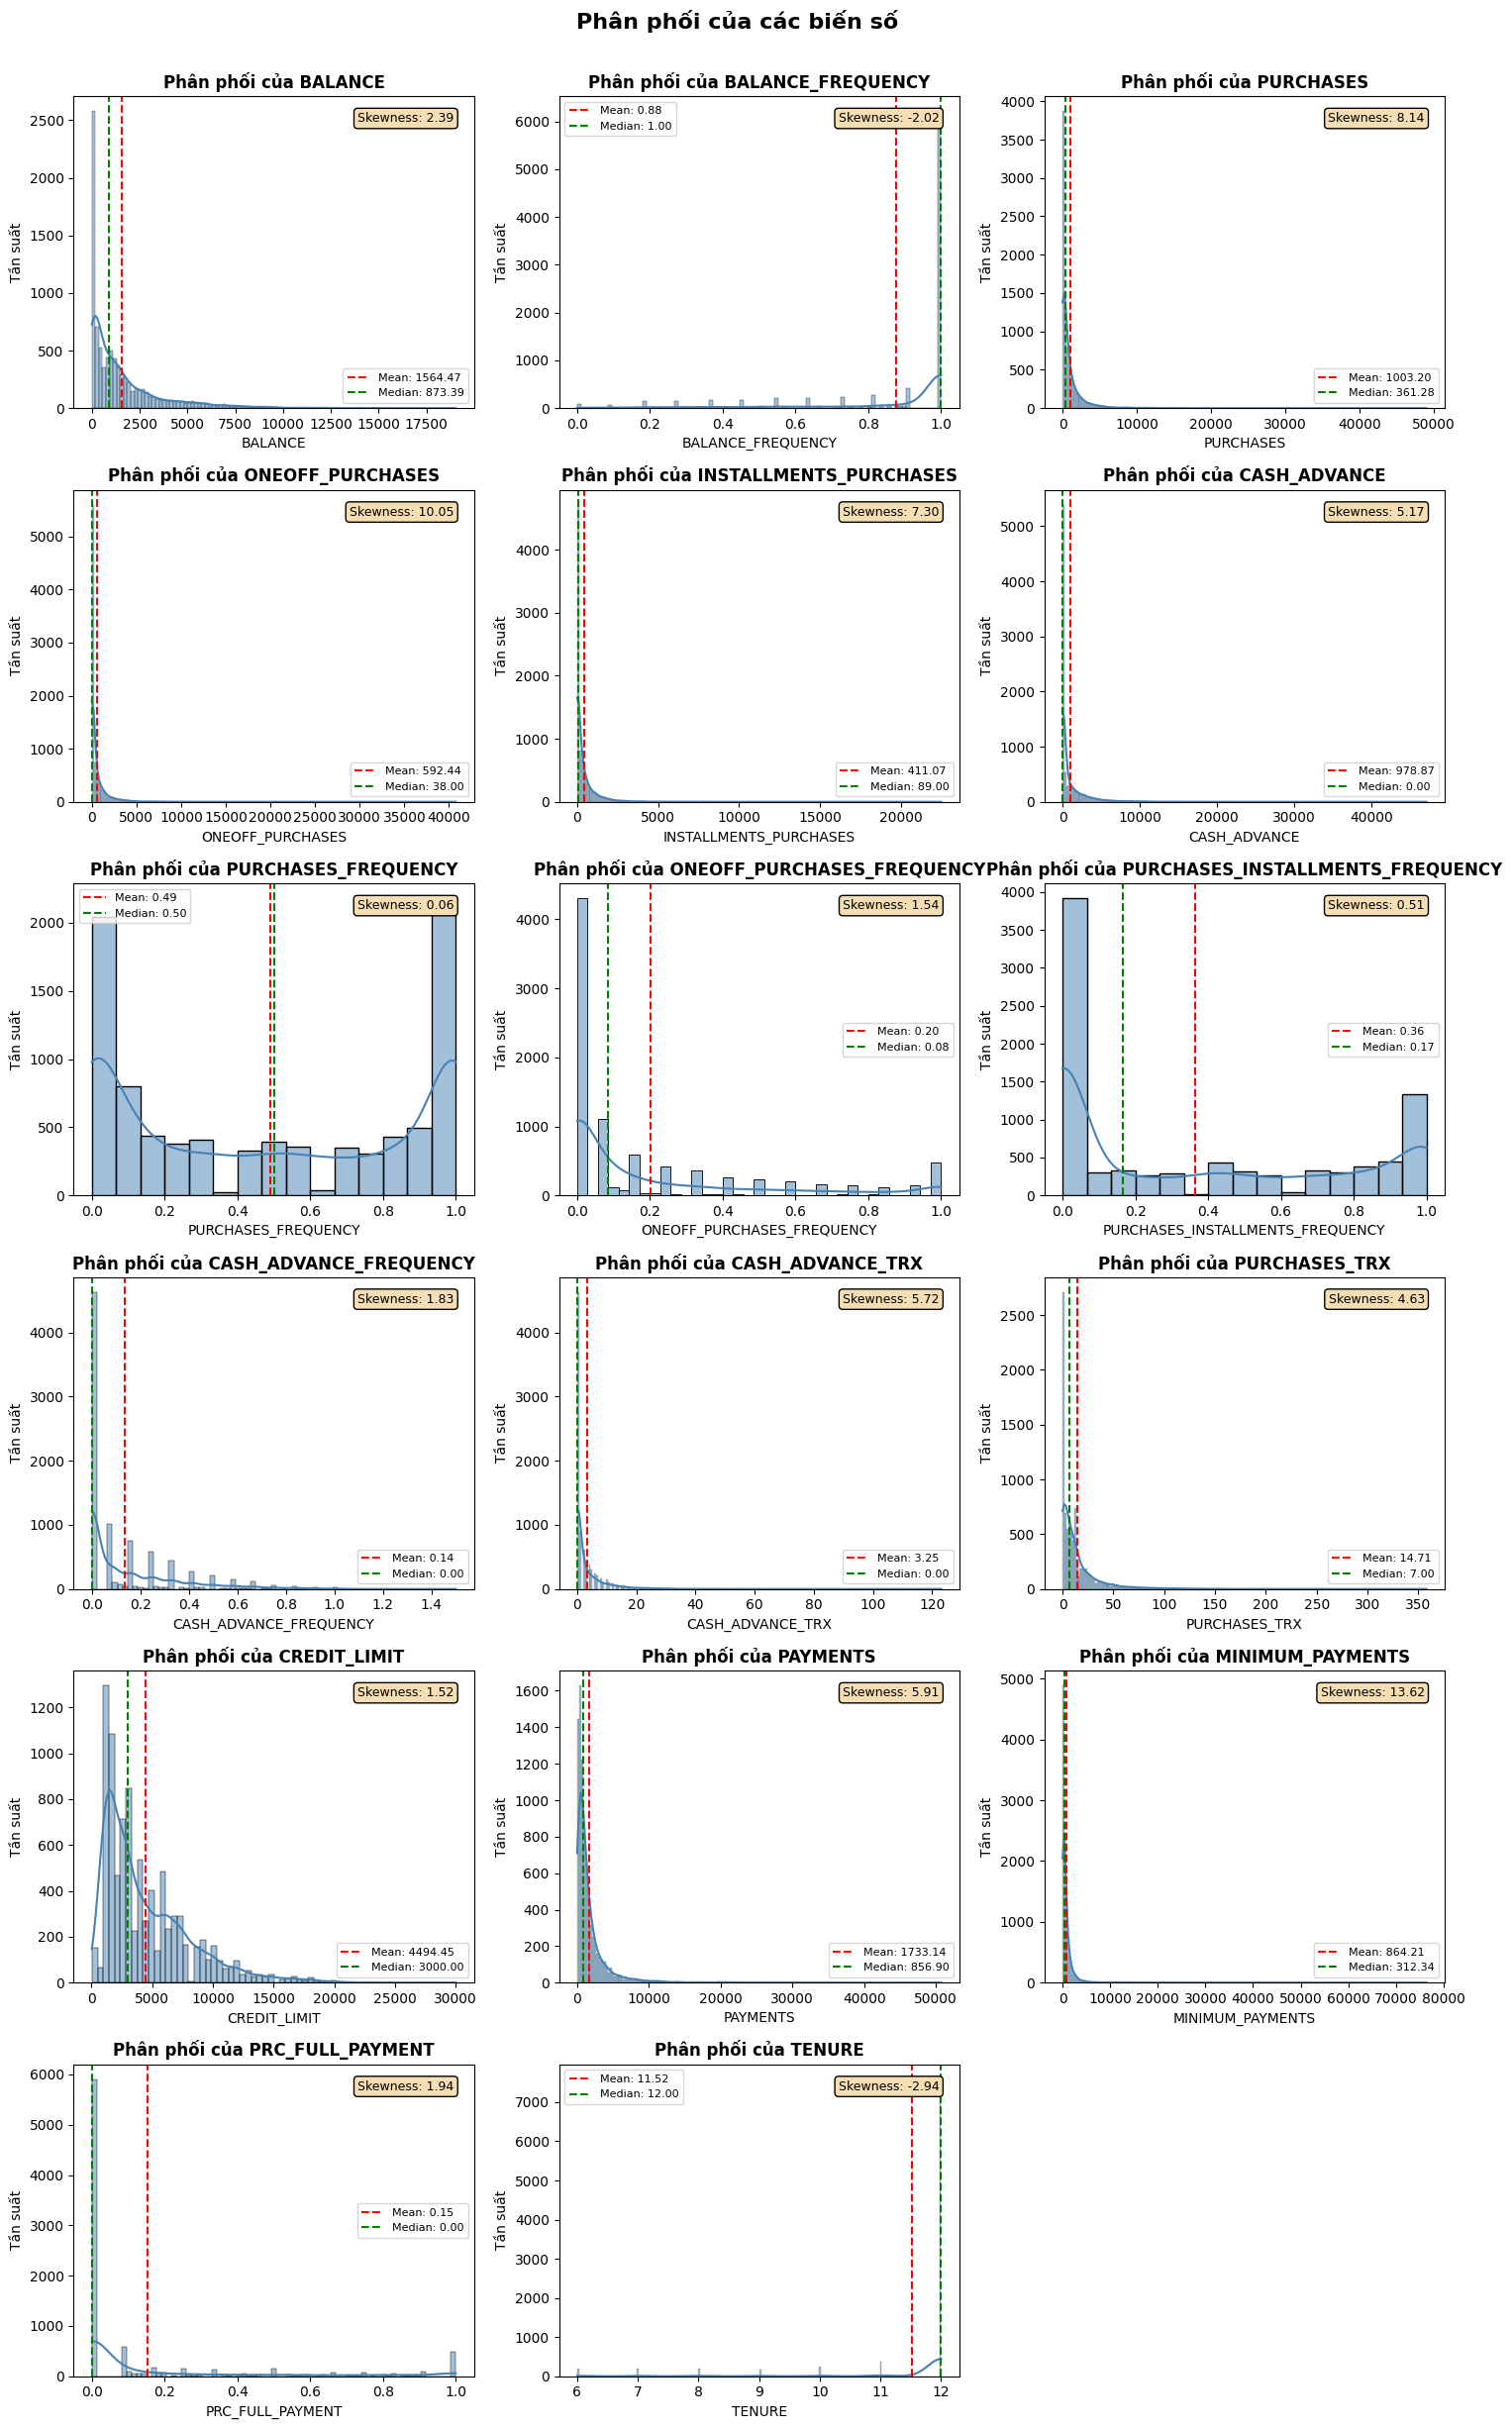


Độ lệch (Skewness) của các biến:
--------------------------------------------------
BALANCE                            :    2.393 - Lệch phải
BALANCE_FREQUENCY                  :   -2.023 - Lệch trái
PURCHASES                          :    8.144 - Lệch phải
ONEOFF_PURCHASES                   :   10.045 - Lệch phải
INSTALLMENTS_PURCHASES             :    7.299 - Lệch phải
CASH_ADVANCE                       :    5.167 - Lệch phải
PURCHASES_FREQUENCY                :    0.060 - Phân phối gần đối xứng
ONEOFF_PURCHASES_FREQUENCY         :    1.536 - Lệch phải
PURCHASES_INSTALLMENTS_FREQUENCY   :    0.509 - Lệch phải
CASH_ADVANCE_FREQUENCY             :    1.829 - Lệch phải
CASH_ADVANCE_TRX                   :    5.721 - Lệch phải
PURCHASES_TRX                      :    4.631 - Lệch phải
CREDIT_LIMIT                       :    1.522 - Lệch phải
PAYMENTS                           :    5.908 - Lệch phải
MINIMUM_PAYMENTS                   :   13.623 - Lệch phải
PRC_FULL_PAYMENT                

In [5]:
# Lấy các cột số (loại bỏ CUST_ID)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Tạo figure với nhiều subplot
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    # Vẽ histogram với KDE
    sns.histplot(df[col], kde=True, ax=ax, color='steelblue', edgecolor='black')
    ax.set_title(f'Phân phối của {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Tần suất')
    
    # Thêm thông tin skewness
    skew_val = df[col].skew()
    ax.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    ax.axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')
    ax.legend(fontsize=8)
    ax.text(0.95, 0.95, f'Skewness: {skew_val:.2f}', transform=ax.transAxes, 
            ha='right', va='top', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat'))

# Ẩn các subplot thừa
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Phân phối của các biến số', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Hiển thị thông tin skewness
print("\nĐộ lệch (Skewness) của các biến:")
print("-" * 50)
for col in numeric_cols:
    skew = df[col].skew()
    if abs(skew) < 0.5:
        skew_type = "Phân phối gần đối xứng"
    elif skew > 0:
        skew_type = "Lệch phải"
    else:
        skew_type = "Lệch trái"
    print(f"{col:35s}: {skew:8.3f} - {skew_type}")

### **1.2.1 Phan tich theo nhom bien (Amount vs Frequency)**

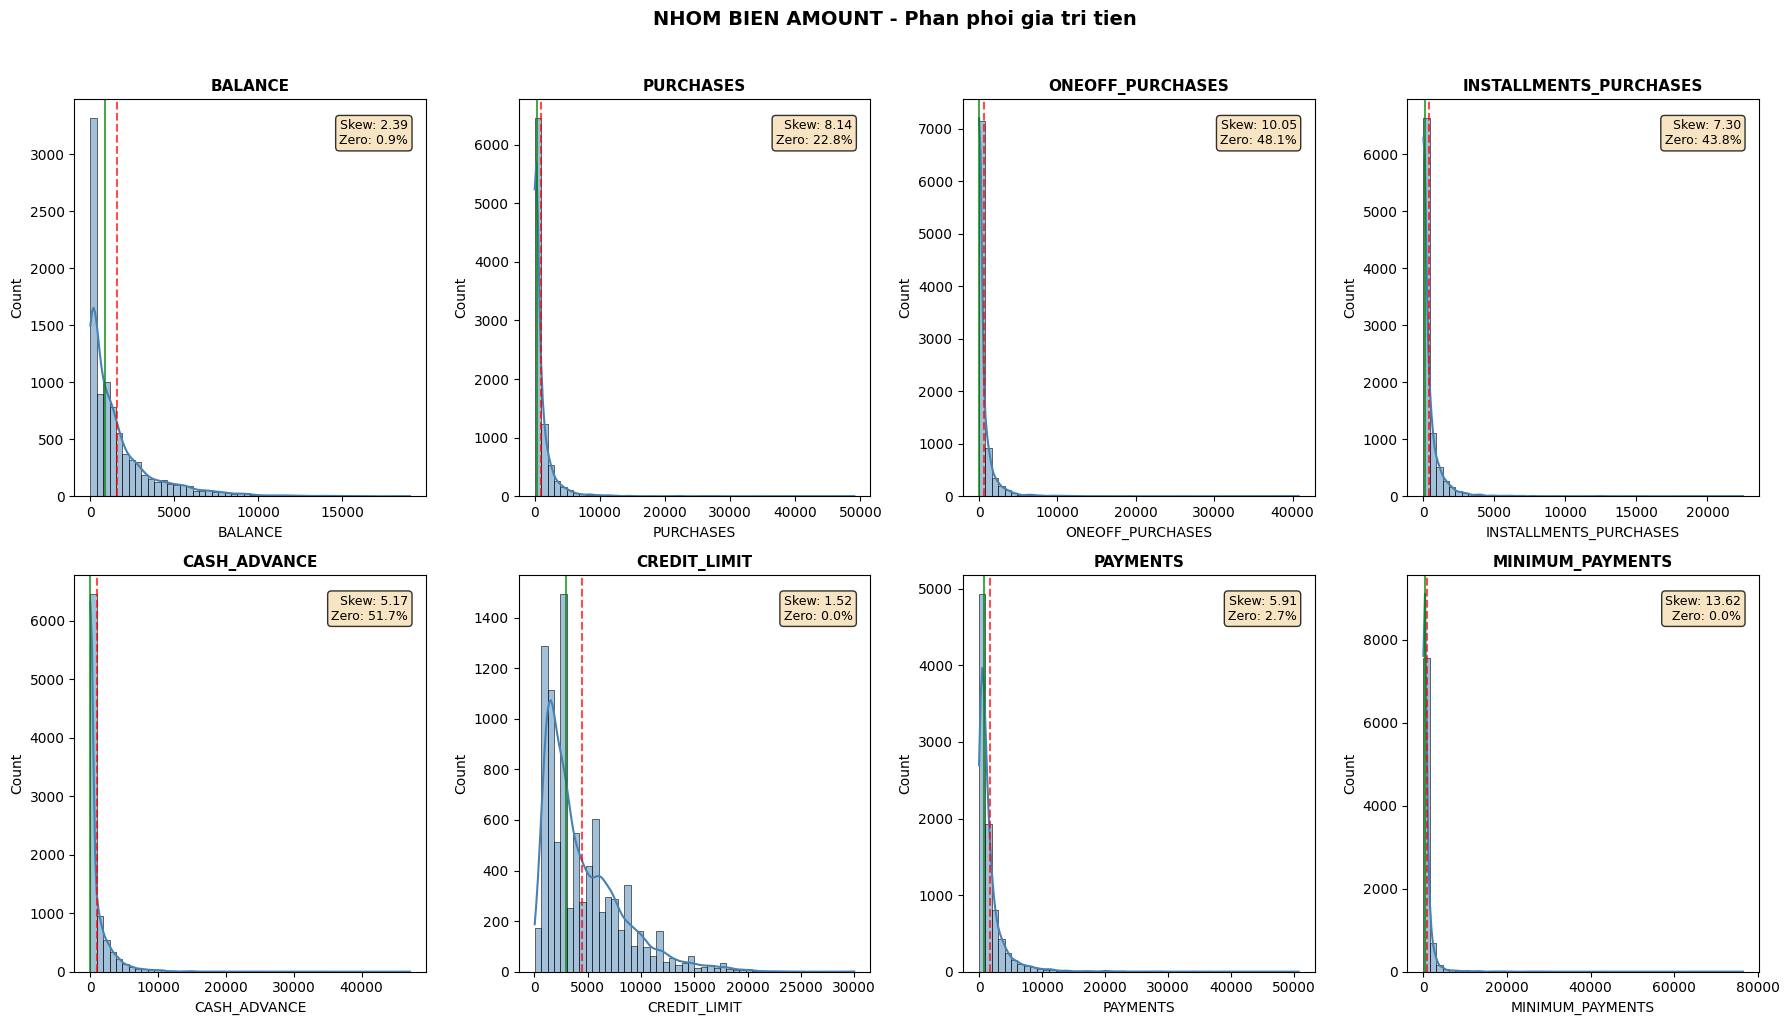

NHAN XET NHOM AMOUNT:
  - BALANCE: Lech phai MANH (skew=2.39) --> Can log transform
  - PURCHASES: Lech phai MANH (skew=8.14) --> Can log transform
    [!] Co 22.8% gia tri = 0 --> Nhom khach hang khong su dung
  - ONEOFF_PURCHASES: Lech phai MANH (skew=10.05) --> Can log transform
    [!] Co 48.1% gia tri = 0 --> Nhom khach hang khong su dung
  - INSTALLMENTS_PURCHASES: Lech phai MANH (skew=7.30) --> Can log transform
    [!] Co 43.8% gia tri = 0 --> Nhom khach hang khong su dung
  - CASH_ADVANCE: Lech phai MANH (skew=5.17) --> Can log transform
    [!] Co 51.7% gia tri = 0 --> Nhom khach hang khong su dung
  - CREDIT_LIMIT: Lech phai (skew=1.52) --> Nen log transform
  - PAYMENTS: Lech phai MANH (skew=5.91) --> Can log transform
  - MINIMUM_PAYMENTS: Lech phai MANH (skew=13.62) --> Can log transform


In [6]:
amount_cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
               'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

frequency_cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                  'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(amount_cols):
    if col in df.columns:
        ax = axes[idx]
        sns.histplot(df[col], kde=True, ax=ax, color='steelblue', edgecolor='black', bins=50)
        ax.set_title(f'{col}', fontsize=11, fontweight='bold')
        
        skew_val = df[col].skew()
        zero_pct = (df[col] == 0).sum() / len(df) * 100
        
        info_text = f'Skew: {skew_val:.2f}\nZero: {zero_pct:.1f}%'
        ax.text(0.95, 0.95, info_text, transform=ax.transAxes, ha='right', va='top', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=1.5, alpha=0.7)
        ax.axvline(df[col].median(), color='green', linestyle='-', linewidth=1.5, alpha=0.7)

plt.suptitle('NHOM BIEN AMOUNT - Phan phoi gia tri tien', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("=" * 70)
print("NHAN XET NHOM AMOUNT:")
print("=" * 70)
for col in amount_cols:
    if col in df.columns:
        skew = df[col].skew()
        zero_pct = (df[col] == 0).sum() / len(df) * 100
        if skew > 2:
            print(f"  - {col}: Lech phai MANH (skew={skew:.2f}) --> Can log transform")
        elif skew > 1:
            print(f"  - {col}: Lech phai (skew={skew:.2f}) --> Nen log transform")
        if zero_pct > 20:
            print(f"    [!] Co {zero_pct:.1f}% gia tri = 0 --> Nhom khach hang khong su dung")

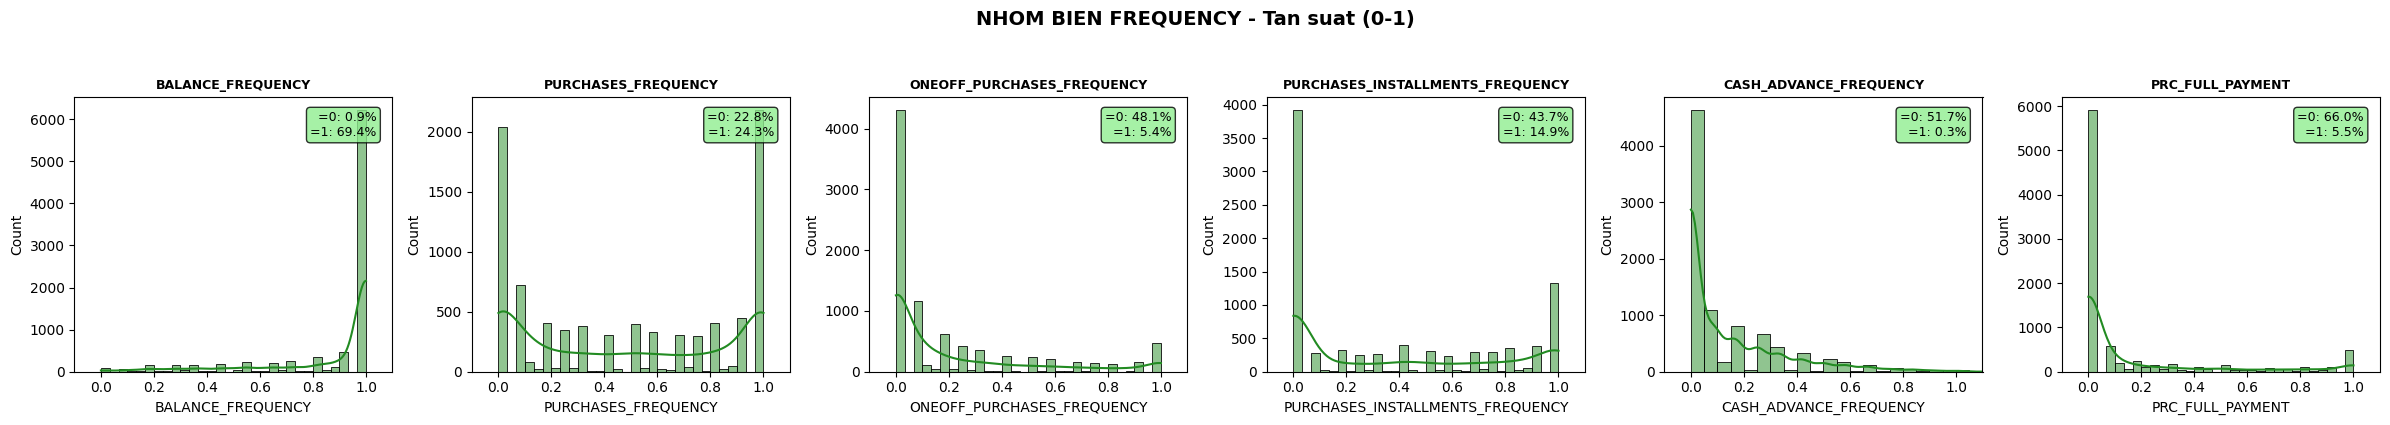


NHAN XET NHOM FREQUENCY:
  - Cac bien frequency co gia tri tu 0 den 1
  - Can scale CUNG voi nhom amount de dam bao cong bang trong clustering
  - Nhieu khach hang co frequency = 0 hoac = 1 (hanh vi cuc doan)


In [7]:
freq_cols_exist = [col for col in frequency_cols if col in df.columns]

n_freq = len(freq_cols_exist)
fig, axes = plt.subplots(1, min(n_freq, 6), figsize=(4*min(n_freq, 6), 4))
if n_freq == 1:
    axes = [axes]

for idx, col in enumerate(freq_cols_exist[:6]):
    ax = axes[idx]
    sns.histplot(df[col], kde=True, ax=ax, color='forestgreen', edgecolor='black', bins=30)
    ax.set_title(f'{col}', fontsize=9, fontweight='bold')
    ax.set_xlim(-0.1, 1.1)
    
    at_zero = (df[col] == 0).sum() / len(df) * 100
    at_one = (df[col] == 1).sum() / len(df) * 100
    ax.text(0.95, 0.95, f'=0: {at_zero:.1f}%\n=1: {at_one:.1f}%',
            transform=ax.transAxes, ha='right', va='top', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.suptitle('NHOM BIEN FREQUENCY - Tan suat (0-1)', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("NHAN XET NHOM FREQUENCY:")
print("=" * 70)
print("  - Cac bien frequency co gia tri tu 0 den 1")
print("  - Can scale CUNG voi nhom amount de dam bao cong bang trong clustering")
print("  - Nhieu khach hang co frequency = 0 hoac = 1 (hanh vi cuc doan)")

### **1.3 Ma trận tương quan**

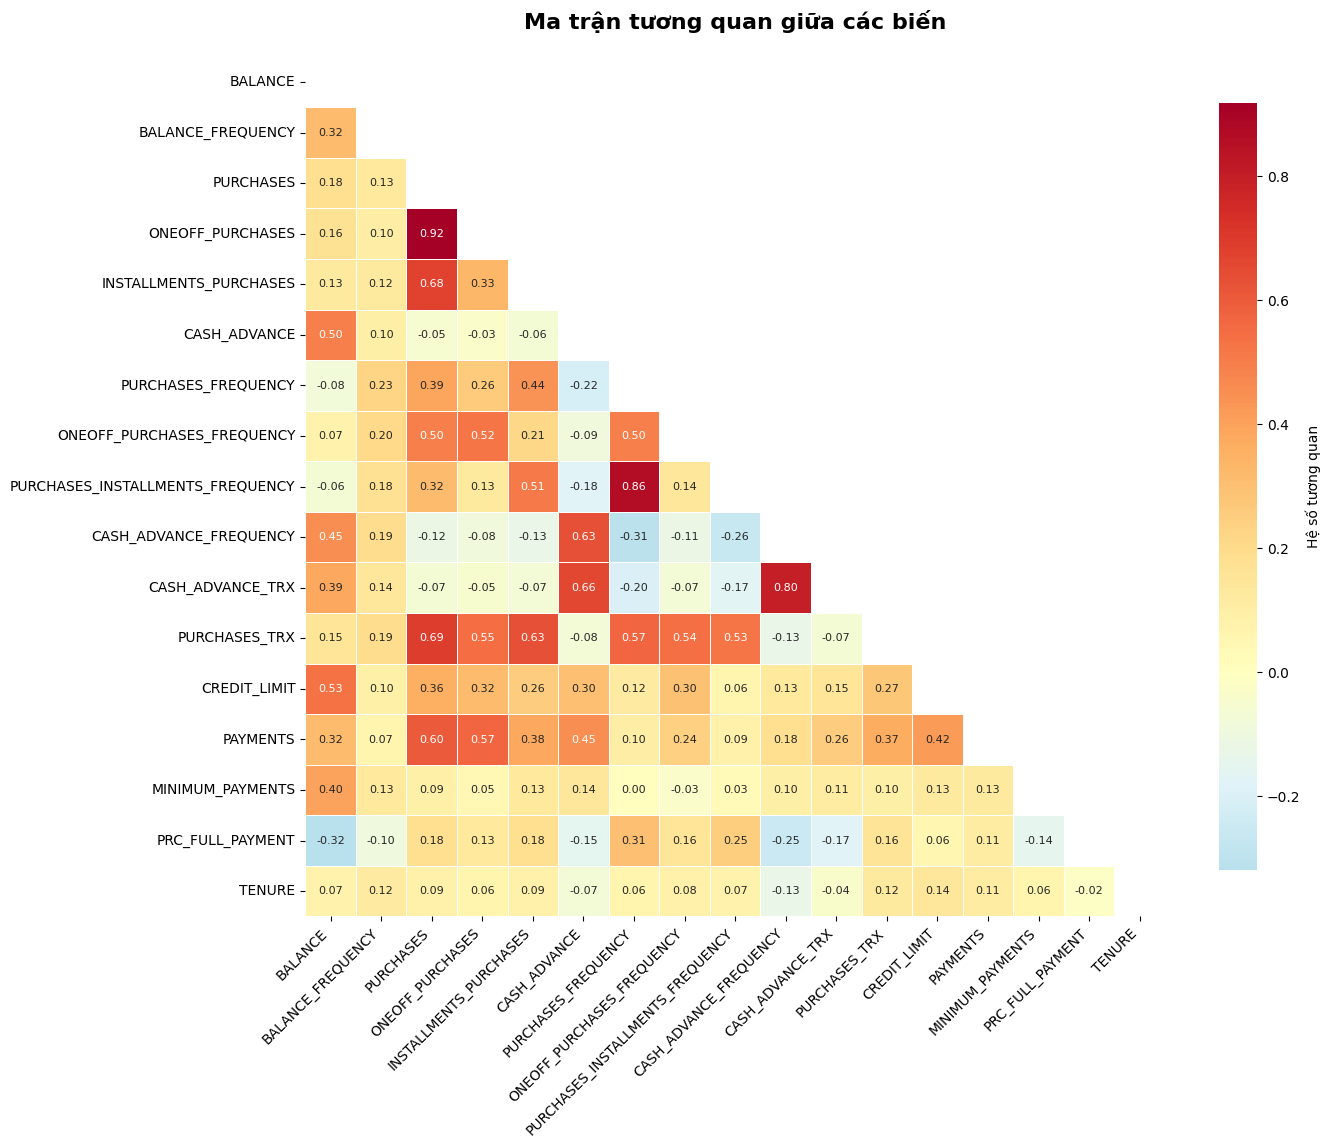


các cặp biến có tương quan CAO (|r| > 0.7):
------------------------------------------------------------


,Biến 1,Biến 2,Tương quan
0,PURCHASES,ONEOFF_PURCHASES,0.916845
1,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,0.862934
2,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,0.799561


In [8]:
# Tính ma trận tương quan (chỉ với các cột số)
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()

# Vẽ heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask nửa trên

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='RdYlBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Hệ số tương quan"},
            annot_kws={"size": 8})

plt.title('Ma trận tương quan giữa các biến', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Tìm các cặp biến có tương quan cao
print("\ncác cặp biến có tương quan CAO (|r| > 0.7):")
print("-" * 60)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Biến 1': correlation_matrix.columns[i],
                'Biến 2': correlation_matrix.columns[j],
                'Tương quan': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Tương quan', ascending=False)
    display(high_corr_df)
else:
    print("Không có cặp biến nào có tương quan cao (|r| > 0.7)")

### **1.3.1 Scatter Plots - Phat hien Patterns**

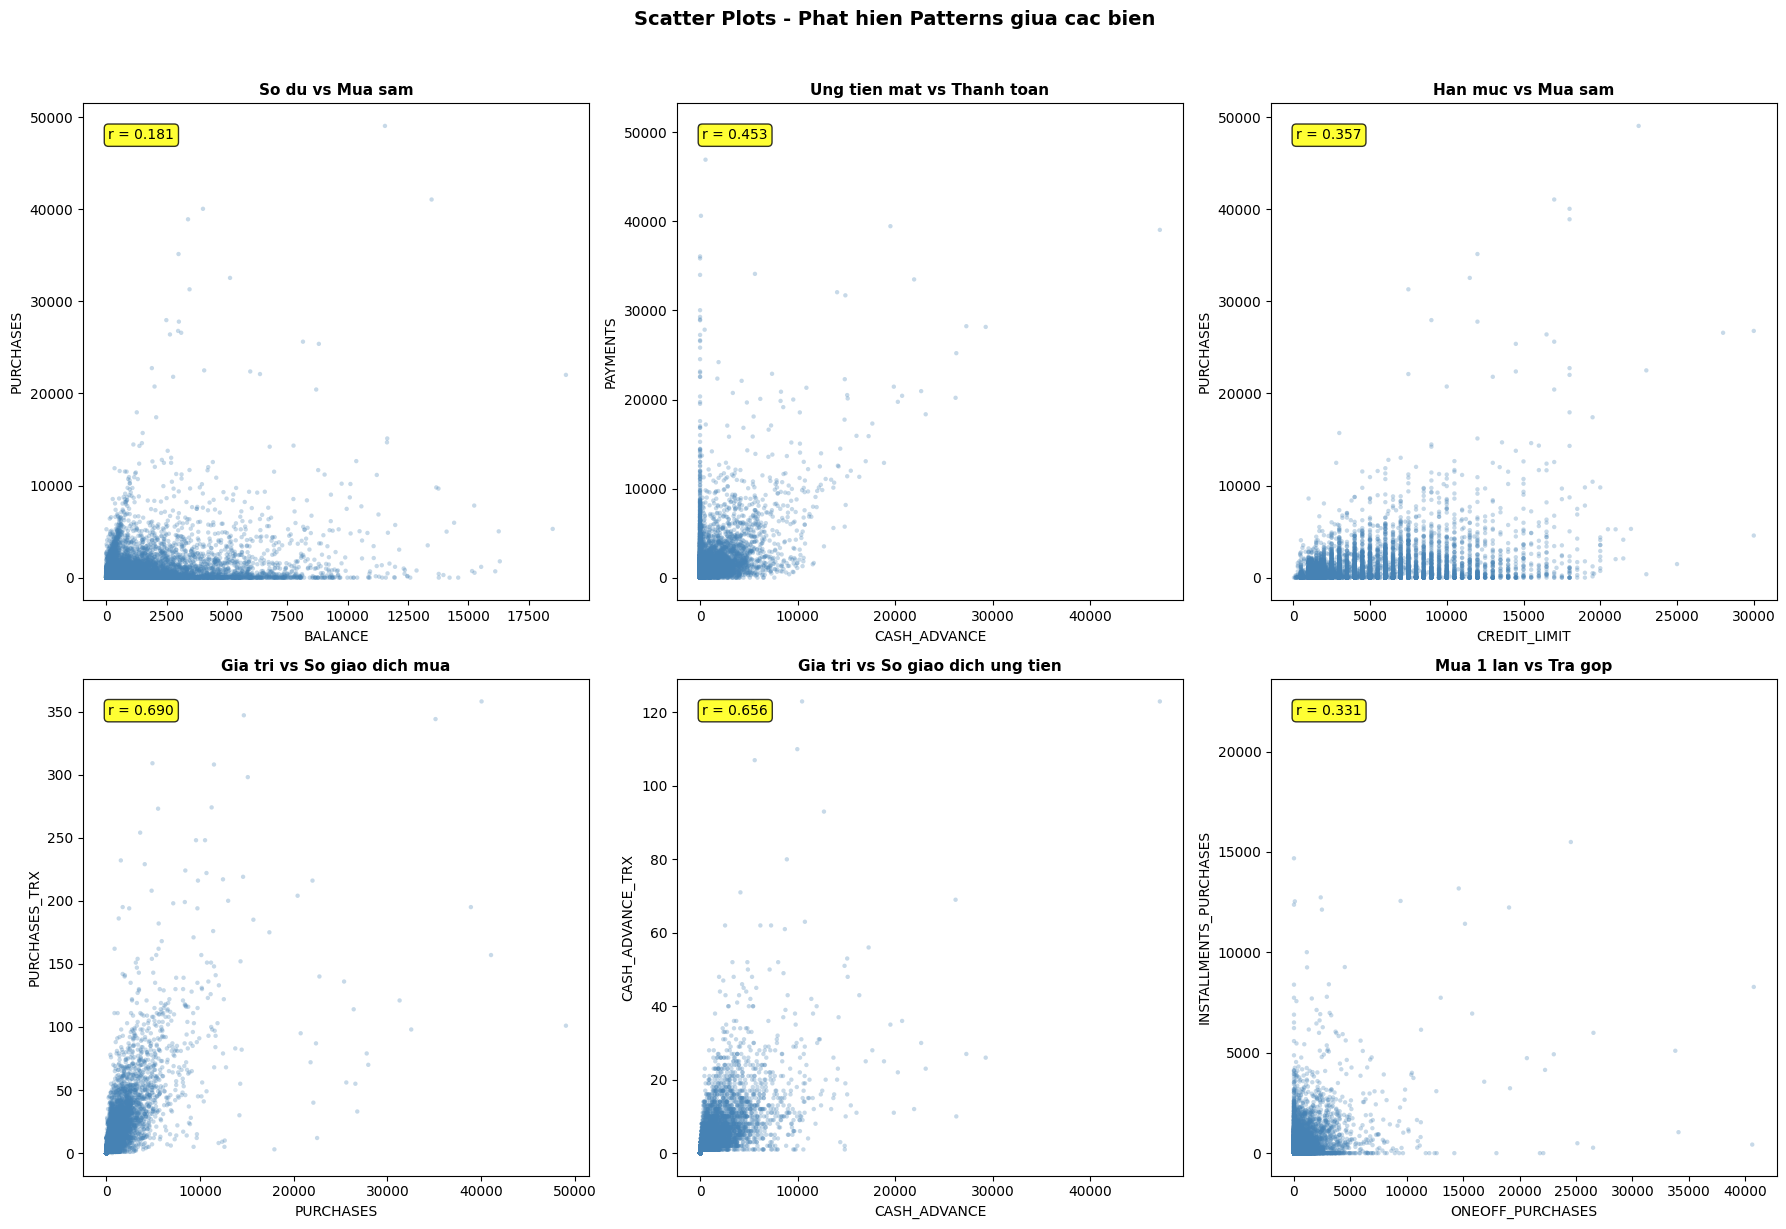

PHAT HIEN TU SCATTER PLOTS:
  - Co 2044 khach hang (22.8%) khong mua sam (PURCHASES=0)
  - Co 4322 khach hang (48.3%) su dung ung tien mat
  - [!] Co 2043 khach hang KHONG mua sam nhung CO ung tien mat
      --> Day la nhom hanh vi DAC BIET, co the la nhom rui ro cao

  - PURCHASES vs PURCHASES_TRX: r = 0.690
      --> Tuong quan CAO, co the loai 1 bien de giam redundancy


In [9]:
scatter_pairs = [
    ('BALANCE', 'PURCHASES', 'So du vs Mua sam'),
    ('CASH_ADVANCE', 'PAYMENTS', 'Ung tien mat vs Thanh toan'),
    ('CREDIT_LIMIT', 'PURCHASES', 'Han muc vs Mua sam'),
    ('PURCHASES', 'PURCHASES_TRX', 'Gia tri vs So giao dich mua'),
    ('CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'Gia tri vs So giao dich ung tien'),
    ('ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'Mua 1 lan vs Tra gop')
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (col1, col2, title) in enumerate(scatter_pairs):
    if col1 in df.columns and col2 in df.columns:
        ax = axes[idx]
        ax.scatter(df[col1], df[col2], alpha=0.3, s=10, c='steelblue', edgecolors='none')
        ax.set_xlabel(col1, fontsize=10)
        ax.set_ylabel(col2, fontsize=10)
        ax.set_title(title, fontsize=11, fontweight='bold')
        
        corr = df[col1].corr(df[col2])
        ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes, fontsize=10, va='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.suptitle('Scatter Plots - Phat hien Patterns giua cac bien', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("=" * 70)
print("PHAT HIEN TU SCATTER PLOTS:")
print("=" * 70)

no_purchase = (df['PURCHASES'] == 0).sum()
has_cash_advance = (df['CASH_ADVANCE'] > 0).sum()
no_purchase_has_cash = ((df['PURCHASES'] == 0) & (df['CASH_ADVANCE'] > 0)).sum()

print(f"  - Co {no_purchase} khach hang ({no_purchase/len(df)*100:.1f}%) khong mua sam (PURCHASES=0)")
print(f"  - Co {has_cash_advance} khach hang ({has_cash_advance/len(df)*100:.1f}%) su dung ung tien mat")
print(f"  - [!] Co {no_purchase_has_cash} khach hang KHONG mua sam nhung CO ung tien mat")
print(f"      --> Day la nhom hanh vi DAC BIET, co the la nhom rui ro cao")
print(f"\n  - PURCHASES vs PURCHASES_TRX: r = {df['PURCHASES'].corr(df['PURCHASES_TRX']):.3f}")
print(f"      --> Tuong quan CAO, co the loai 1 bien de giam redundancy")

In [10]:
print("=" * 70)
print("PHAN TICH NHOM BIEN TUONG QUAN MANH")
print("=" * 70)

corr_pairs_analysis = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            level = 'RAT CAO' if abs(corr_val) > 0.8 else ('CAO' if abs(corr_val) > 0.7 else 'TRUNG BINH')
            corr_pairs_analysis.append({
                'Bien 1': correlation_matrix.columns[i],
                'Bien 2': correlation_matrix.columns[j],
                'Correlation': round(corr_val, 3),
                'Muc do': level
            })

corr_analysis_df = pd.DataFrame(corr_pairs_analysis).sort_values('Correlation', ascending=False)
print("\nCac cap bien co tuong quan |r| > 0.5:")
display(corr_analysis_df)

print("\n" + "-" * 70)
print("NHOM TUONG QUAN:")
print("-" * 70)
print("""
  NHOM 1 - Hanh vi MUA SAM:
  - PURCHASES <-> PURCHASES_TRX <-> ONEOFF_PURCHASES <-> INSTALLMENTS_PURCHASES
  - PURCHASES_FREQUENCY <-> cac bien frequency khac
  --> Khach hang mua nhieu thi tan suat cao

  NHOM 2 - Hanh vi UNG TIEN MAT:
  - CASH_ADVANCE <-> CASH_ADVANCE_TRX <-> CASH_ADVANCE_FREQUENCY
  --> Khach hang ung tien thuong ung nhieu lan

  NHOM 3 - Kha nang THANH TOAN:
  - CREDIT_LIMIT <-> BALANCE <-> PAYMENTS
  --> Han muc cao thuong di kem so du va thanh toan cao

  [!] LUU Y: Nhieu bien trong cung nhom co the gay REDUNDANCY
      --> Can can nhac loai bot hoac dung PCA
""")

PHAN TICH NHOM BIEN TUONG QUAN MANH

Cac cap bien co tuong quan |r| > 0.5:


,Bien 1,Bien 2,Correlation,Muc do
1,PURCHASES,ONEOFF_PURCHASES,0.917,RAT CAO
13,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,0.863,RAT CAO
17,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,0.800,CAO
3,PURCHASES,PURCHASES_TRX,0.690,TRUNG BINH
2,PURCHASES,INSTALLMENTS_PURCHASES,0.680,TRUNG BINH
11,CASH_ADVANCE,CASH_ADVANCE_TRX,0.656,TRUNG BINH
10,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,0.629,TRUNG BINH
9,INSTALLMENTS_PURCHASES,PURCHASES_TRX,0.628,TRUNG BINH
4,PURCHASES,PAYMENTS,0.603,TRUNG BINH
14,PURCHASES_FREQUENCY,PURCHASES_TRX,0.568,TRUNG BINH



----------------------------------------------------------------------
NHOM TUONG QUAN:
----------------------------------------------------------------------

  NHOM 1 - Hanh vi MUA SAM:
  - PURCHASES <-> PURCHASES_TRX <-> ONEOFF_PURCHASES <-> INSTALLMENTS_PURCHASES
  - PURCHASES_FREQUENCY <-> cac bien frequency khac
  --> Khach hang mua nhieu thi tan suat cao

  NHOM 2 - Hanh vi UNG TIEN MAT:
  - CASH_ADVANCE <-> CASH_ADVANCE_TRX <-> CASH_ADVANCE_FREQUENCY
  --> Khach hang ung tien thuong ung nhieu lan

  NHOM 3 - Kha nang THANH TOAN:
  - CREDIT_LIMIT <-> BALANCE <-> PAYMENTS
  --> Han muc cao thuong di kem so du va thanh toan cao

  [!] LUU Y: Nhieu bien trong cung nhom co the gay REDUNDANCY
      --> Can can nhac loai bot hoac dung PCA



### **1.4 Phát hiện outliers**

Thống kê Outliers theo phương pháp IQR:
Biến                                 Số outliers    Tỷ lệ (%)   Giới hạn dưới   Giới hạn trên
--------------------------------------------------------------------------------
BALANCE                                      695        7.77%        -2760.51         4942.93
BALANCE_FREQUENCY                          1,493       16.68%            0.72            1.17
PURCHASES                                    808        9.03%        -1566.11         2715.87
ONEOFF_PURCHASES                           1,013       11.32%         -866.11         1443.51
INSTALLMENTS_PURCHASES                       867        9.69%         -702.96         1171.59
CASH_ADVANCE                               1,030       11.51%        -1670.73         2784.55
PURCHASES_FREQUENCY                            0        0.00%           -1.17            2.17
ONEOFF_PURCHASES_FREQUENCY                   782        8.74%           -0.45            0.75
PURCHASES_INSTALLMENTS_FREQUENCY 

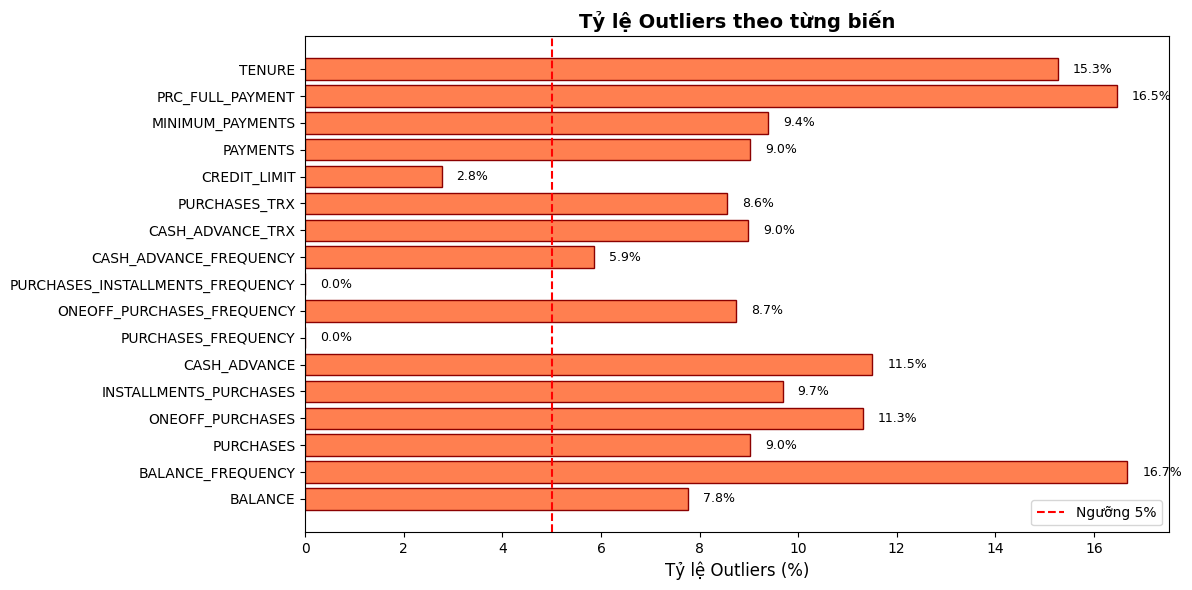

In [11]:
# Thống kê số lượng outliers theo phương pháp IQR
def count_outliers_iqr(df, column):
    """Đếm số outliers sử dụng phương pháp IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("Thống kê Outliers theo phương pháp IQR:")
print("=" * 80)
print(f"{'Biến':<35} {'Số outliers':>12} {'Tỷ lệ (%)':>12} {'Giới hạn dưới':>15} {'Giới hạn trên':>15}")
print("-" * 80)

outlier_summary = []
for col in numeric_cols:
    n_outliers, lower, upper = count_outliers_iqr(df, col)
    pct = (n_outliers / len(df)) * 100
    outlier_summary.append({
        'Biến': col,
        'Số outliers': n_outliers,
        'Tỷ lệ (%)': pct,
        'Giới hạn dưới': lower,
        'Giới hạn trên': upper
    })
    print(f"{col:<35} {n_outliers:>12,} {pct:>11.2f}% {lower:>15.2f} {upper:>15.2f}")

# Tạo biểu đồ tổng hợp outliers
outlier_df = pd.DataFrame(outlier_summary)
plt.figure(figsize=(12, 6))
bars = plt.barh(outlier_df['Biến'], outlier_df['Tỷ lệ (%)'], color='coral', edgecolor='darkred')
plt.xlabel('Tỷ lệ Outliers (%)', fontsize=12)
plt.title('Tỷ lệ Outliers theo từng biến', fontsize=14, fontweight='bold')
plt.axvline(x=5, color='red', linestyle='--', label='Ngưỡng 5%')
plt.legend()

# Thêm giá trị lên bars
for bar, val in zip(bars, outlier_df['Tỷ lệ (%)']):
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
             f'{val:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

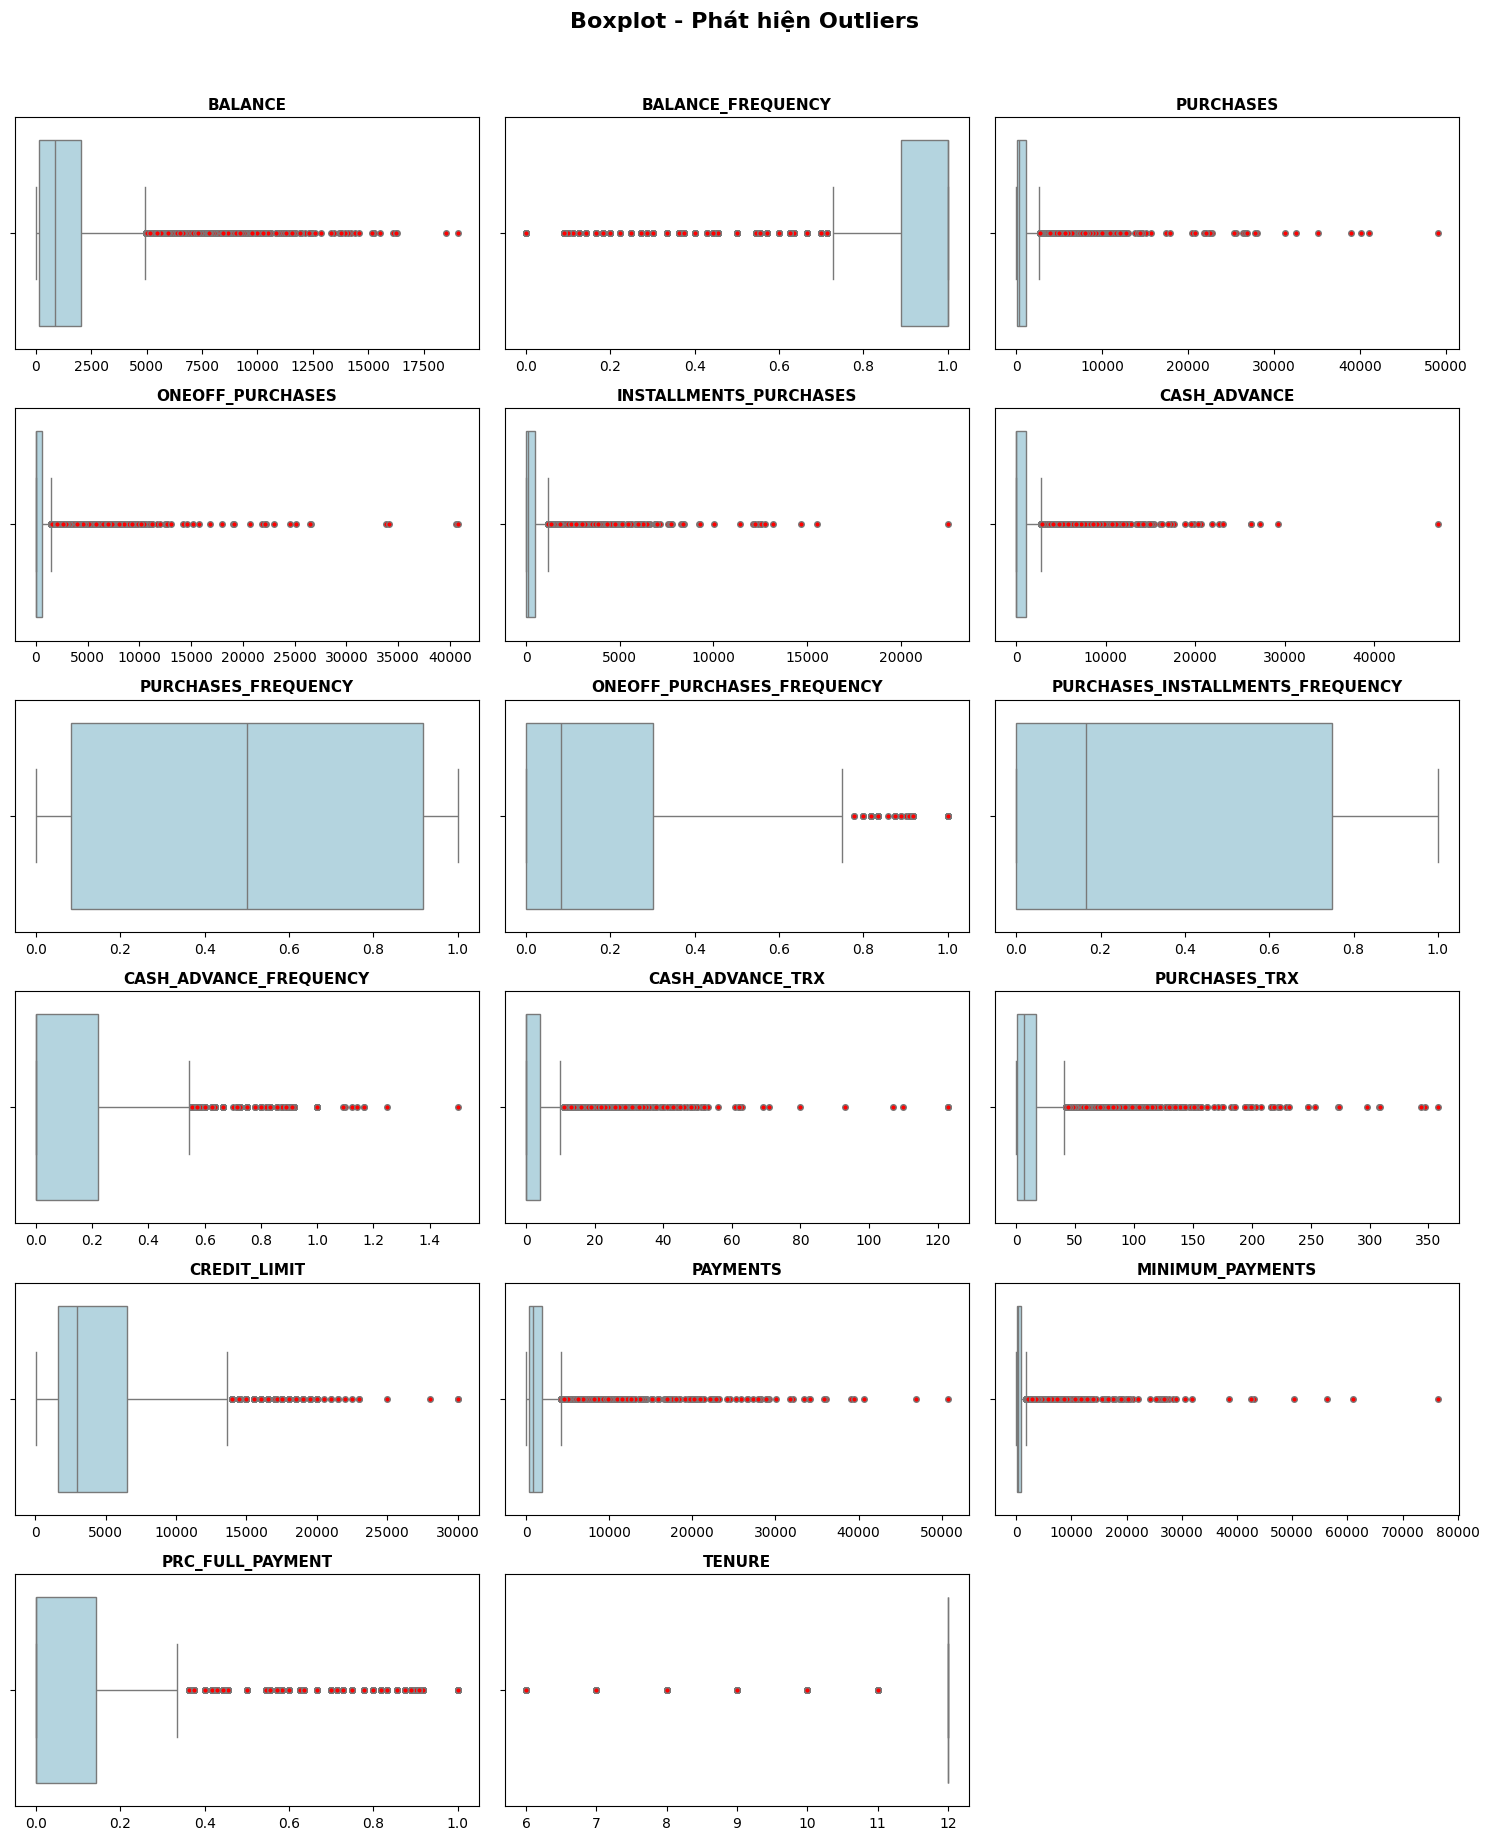

In [12]:
# Vẽ boxplot cho tất cả các biến số để phát hiện outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    sns.boxplot(x=df[col], ax=ax, color='lightblue', flierprops=dict(markerfacecolor='red', marker='o', markersize=4))
    ax.set_title(f'{col}', fontsize=11, fontweight='bold')
    ax.set_xlabel('')

# Ẩn các subplot thừa
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Boxplot - Phát hiện Outliers', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### **1.5 Tong hop Insights tu EDA**

In [13]:
print("=" * 70)
print("TONG HOP INSIGHTS TU KHAM PHA DU LIEU (EDA)")
print("=" * 70)

print("""
[1] VE PHAN PHOI DU LIEU:
    - Tat ca bien AMOUNT lech phai MANH (skewness > 2)
      --> CAN log transform truoc khi clustering
    
    - Bien FREQUENCY co gia tri 0-1, nhieu gia tri cuc doan (0 hoac 1)
      --> CAN scale cung voi amount de dam bao cong bang

    - Nhieu bien co TY LE ZERO CAO (PURCHASES, CASH_ADVANCE, ...)
      --> Co nhieu NHOM KHACH HANG KHAC BIET

[2] VE OUTLIERS:
    - Cac bien amount co NHIEU outliers (10-25%)
    - Phuong phap IQR se loai qua nhieu du lieu
      --> NEN dung Winsorize (clip percentile) thay vi loai bo

[3] VE TUONG QUAN:
    - PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES (redundant)
      --> CAN loai bo 1 trong 3
    
    - PURCHASES <-> PURCHASES_TRX tuong quan rat cao (r > 0.8)
      --> CAN loai bo 1

    - Cac nhom bien tuong quan manh:
      + Nhom mua sam: PURCHASES, ONEOFF, INSTALLMENTS, PURCHASES_TRX
      + Nhom ung tien: CASH_ADVANCE, CASH_ADVANCE_TRX, CASH_ADVANCE_FREQUENCY
      --> Co the dung PCA de giam chieu

[4] VE NHOM KHACH HANG DAC BIET:
    - Nhom KHONG MUA SAM nhung CO UNG TIEN MAT
      --> Hanh vi rui ro, can theo doi

    - Nhom mua sam THUONG XUYEN (frequency = 1)
      --> Khach hang trung thanh

    - Nhom THANH TOAN DAY DU (PRC_FULL_PAYMENT = 1)
      --> Khach hang tot, it rui ro
""")

print("=" * 70)
print("KET THUC PHAN EDA - SAN SANG CHO TIEN XU LY")
print("=" * 70)

TONG HOP INSIGHTS TU KHAM PHA DU LIEU (EDA)

[1] VE PHAN PHOI DU LIEU:
    - Tat ca bien AMOUNT lech phai MANH (skewness > 2)
      --> CAN log transform truoc khi clustering

    - Bien FREQUENCY co gia tri 0-1, nhieu gia tri cuc doan (0 hoac 1)
      --> CAN scale cung voi amount de dam bao cong bang

    - Nhieu bien co TY LE ZERO CAO (PURCHASES, CASH_ADVANCE, ...)
      --> Co nhieu NHOM KHACH HANG KHAC BIET

[2] VE OUTLIERS:
    - Cac bien amount co NHIEU outliers (10-25%)
    - Phuong phap IQR se loai qua nhieu du lieu
      --> NEN dung Winsorize (clip percentile) thay vi loai bo

[3] VE TUONG QUAN:
    - PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES (redundant)
      --> CAN loai bo 1 trong 3

    - PURCHASES <-> PURCHASES_TRX tuong quan rat cao (r > 0.8)
      --> CAN loai bo 1

    - Cac nhom bien tuong quan manh:
      + Nhom mua sam: PURCHASES, ONEOFF, INSTALLMENTS, PURCHASES_TRX
      + Nhom ung tien: CASH_ADVANCE, CASH_ADVANCE_TRX, CASH_ADVANCE_FREQUENCY
      -->

## **2. TIỀN XỬ LÝ DỮ LIỆU**

### **Pipeline Tiền Xử Lý Dữ Liệu**

```
┌─────────────────────────────────────────────────────────────────────────────┐
│                        PIPELINE TIỀN XỬ LÝ DỮ LIỆU                          │
├─────────────────────────────────────────────────────────────────────────────┤
│  1. DROP ID                                                                  │
│     └── Loại bỏ CUST_ID (định danh, không mang thông tin phân cụm)          │
│                              ▼                                               │
│  2. XỬ LÝ MISSING VALUES                                                    │
│     ├── MINIMUM_PAYMENTS → Median (ổn định với outliers)                    │
│     └── CREDIT_LIMIT → Median (chỉ 1 giá trị thiếu)                         │
│                              ▼                                               │
│  3. XỬ LÝ OUTLIERS (Winsorize)                                              │
│     └── Clip theo percentile 1% - 99% (bảo toàn phân phối)                  │
│                              ▼                                               │
│  4. GIẢM SKEWNESS                                                           │
│     └── Log1p transform cho các biến "amount" lệch phải                     │
│                              ▼                                               │
│  5. CHUẨN HÓA (SCALING)                                                     │
│     └── StandardScaler (mean=0, std=1) - cần thiết cho K-Means              │
│                              ▼                                               │
│  6. FEATURE SELECTION / GIẢM CHIỀU                                          │
│     ├── Loại biến đa cộng tuyến (VIF > 10 hoặc |r| > 0.85)                  │
│     └── PCA cho trực quan hóa và clustering                                 │
└─────────────────────────────────────────────────────────────────────────────┘
```

**Lý do cho từng bước:**
- **Drop ID**: CUST_ID là mã định danh, không có ý nghĩa phân cụm
- **Median cho missing**: Robust hơn mean khi có nhiều outliers
- **Winsorize**: Giữ lại dữ liệu thay vì loại bỏ, tránh mất thông tin
- **Log1p**: Giảm skewness giúp K-Means hoạt động tốt hơn (K-Means nhạy với scale)
- **StandardScaler**: K-Means dựa trên khoảng cách Euclidean, cần chuẩn hóa
- **Feature Selection**: Giảm đa cộng tuyến, tăng khả năng diễn giải

### **2.1 Xử lý missing values**

In [14]:
# ============================================================================
# BƯỚC 1: CHUẨN BỊ DỮ LIỆU - DROP ID VÀ TẠO BẢN SAO
# ============================================================================

# Tạo bản sao để xử lý (giữ nguyên df gốc)
df_processed = df.copy()

# Lưu CUST_ID để tham chiếu sau này nếu cần
customer_ids = df_processed['CUST_ID'].copy()

# Bỏ cột CUST_ID (định danh, không mang thông tin phân cụm)
ID_COL = 'CUST_ID'
df_processed = df_processed.drop(columns=[ID_COL])

print("=" * 60)
print("BƯỚC 1: DROP CUST_ID")
print("=" * 60)
print(f"[OK] Da loai bo cot '{ID_COL}' - la ma dinh danh, khong co y nghia phan cum")
print(f"[OK] So cot con lai: {df_processed.shape[1]}")
print(f"[OK] Cac cot: {list(df_processed.columns)}")

BƯỚC 1: DROP CUST_ID
[OK] Da loai bo cot 'CUST_ID' - la ma dinh danh, khong co y nghia phan cum
[OK] So cot con lai: 17
[OK] Cac cot: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [15]:
# ============================================================================
# BƯỚC 2: XỬ LÝ MISSING VALUES VỚI KNNImputer
# ============================================================================

from sklearn.impute import KNNImputer

print("=" * 70)
print("BƯỚC 2: XỬ LÝ MISSING VALUES (KNNImputer)")
print("=" * 70)

# 2.1 Kiểm tra missing values trước khi xử lý
missing_before = df_processed.isnull().sum()
missing_cols = missing_before[missing_before > 0]

print("\n[INFO] Missing values TRUOC xu ly:")
if len(missing_cols) > 0:
    for col, count in missing_cols.items():
        pct = (count / len(df_processed)) * 100
        print(f"   - {col}: {count} ({pct:.2f}%)")
else:
    print("   Khong co missing values")

# 2.2 Phan tich moi tuong quan giua MINIMUM_PAYMENTS va BALANCE
print("\n" + "-" * 70)
print("PHAN TICH: MINIMUM_PAYMENTS phu thuoc vao BALANCE")
print("-" * 70)

# Tinh correlation giua cac bien (bo qua missing)
temp_df = df_processed[['BALANCE', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'PAYMENTS']].dropna()
corr_with_min_pay = temp_df.corr()['MINIMUM_PAYMENTS'].drop('MINIMUM_PAYMENTS')
print("\nTuong quan voi MINIMUM_PAYMENTS:")
for col, corr in corr_with_min_pay.items():
    print(f"   - {col}: r = {corr:.4f}")

print("\n[!] VAN DE: MINIMUM_PAYMENTS phu thuoc BALANCE (r > 0)")
print("    Dien Median chung se LAM MAT moi tuong quan nay!")
print("    --> Su dung KNNImputer de tim khach hang TUONG TU va dien gia tri")

# 2.3 So sanh phuong phap: Median vs KNNImputer
print("\n" + "-" * 70)
print("SO SANH PHUONG PHAP IMPUTATION")
print("-" * 70)

# Luu gia tri goc de so sanh
df_test = df_processed.copy()
missing_idx = df_test['MINIMUM_PAYMENTS'].isnull()
n_missing = missing_idx.sum()

# Phuong phap 1: Median chung
median_value = df_test['MINIMUM_PAYMENTS'].median()
print(f"\n[1] MEDIAN CHUNG:")
print(f"    Gia tri dien: {median_value:,.2f} (cho tat ca {n_missing} missing)")
print(f"    Van de: Khong xet den BALANCE cua tung khach hang")

# Phuong phap 2: Median theo nhom BALANCE
print(f"\n[2] MEDIAN THEO NHOM BALANCE:")
df_test['BALANCE_GROUP'] = pd.qcut(df_test['BALANCE'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
median_by_group = df_test.groupby('BALANCE_GROUP')['MINIMUM_PAYMENTS'].median()
print("    Median theo nhom BALANCE:")
for group, val in median_by_group.items():
    print(f"       {group}: {val:,.2f}")
print("    Uu diem: Xet den moi tuong quan, de hieu")

# Phuong phap 3: KNNImputer
print(f"\n[3] KNNImputer (k=5):")
print("    Tim 5 khach hang TUONG TU NHAT (dua tren tat ca features)")
print("    Dien gia tri = Trung binh cua 5 neighbor")
print("    Uu diem: Tu dong xet den NHIEU features cung luc")
print("    --> DAY LA PHUONG PHAP DUOC CHON!")

# 2.4 Thuc hien KNNImputer
print("\n" + "-" * 70)
print("THUC HIEN KNNImputer")
print("-" * 70)

# Chon cac features lien quan de KNN tim neighbor
# MINIMUM_PAYMENTS lien quan den: BALANCE, CREDIT_LIMIT, PAYMENTS, PURCHASES
impute_features = ['BALANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PURCHASES', 
                   'CASH_ADVANCE', 'MINIMUM_PAYMENTS']
impute_features = [f for f in impute_features if f in df_processed.columns]

# Tao KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')

# Ap dung
df_impute = df_processed[impute_features].copy()
df_imputed = pd.DataFrame(
    knn_imputer.fit_transform(df_impute),
    columns=impute_features,
    index=df_processed.index
)

# Cap nhat lai MINIMUM_PAYMENTS
df_processed['MINIMUM_PAYMENTS'] = df_imputed['MINIMUM_PAYMENTS']

# Hien thi ket qua
print(f"[OK] Da dien {n_missing} gia tri missing bang KNNImputer (k=5)")
print(f"\n[INFO] Gia tri MINIMUM_PAYMENTS sau khi dien (cho cac dong truoc do missing):")
filled_values = df_processed.loc[missing_idx, 'MINIMUM_PAYMENTS']
print(f"   - Min:    {filled_values.min():>12,.2f}")
print(f"   - Max:    {filled_values.max():>12,.2f}")
print(f"   - Mean:   {filled_values.mean():>12,.2f}")
print(f"   - Median: {filled_values.median():>12,.2f}")

# So sanh voi Median chung
print(f"\n[INFO] So sanh:")
print(f"   - Median chung:        {median_value:>12,.2f}")
print(f"   - KNN mean filled:     {filled_values.mean():>12,.2f}")
print(f"   - KNN phu hop hon vi xet den BALANCE cua tung khach hang")

# 2.5 Xu ly CREDIT_LIMIT (chi 1 missing)
if 'CREDIT_LIMIT' in df_processed.columns and df_processed['CREDIT_LIMIT'].isnull().any():
    median_credit = df_processed['CREDIT_LIMIT'].median()
    df_processed['CREDIT_LIMIT'] = df_processed['CREDIT_LIMIT'].fillna(median_credit)
    print(f"\n[OK] CREDIT_LIMIT: Dien bang MEDIAN = {median_credit:,.2f}")
    print(f"     (Chi 1 gia tri thieu, KNN khong can thiet)")

# 2.6 Kiem tra ket qua cuoi cung
missing_after = df_processed.isnull().sum().sum()
print(f"\n" + "=" * 70)
print(f"[INFO] Missing values SAU xu ly: {missing_after}")
print("[OK] HOAN THANH XU LY MISSING VALUES VOI KNNImputer!")
print("=" * 70)

# Cleanup
df_test.drop('BALANCE_GROUP', axis=1, inplace=True, errors='ignore')

BƯỚC 2: XỬ LÝ MISSING VALUES (KNNImputer)

[INFO] Missing values TRUOC xu ly:
   - CREDIT_LIMIT: 1 (0.01%)
   - MINIMUM_PAYMENTS: 313 (3.50%)

----------------------------------------------------------------------
PHAN TICH: MINIMUM_PAYMENTS phu thuoc vao BALANCE
----------------------------------------------------------------------

Tuong quan voi MINIMUM_PAYMENTS:
   - BALANCE: r = 0.3987
   - CREDIT_LIMIT: r = 0.1267
   - PAYMENTS: r = 0.1266

[!] VAN DE: MINIMUM_PAYMENTS phu thuoc BALANCE (r > 0)
    Dien Median chung se LAM MAT moi tuong quan nay!
    --> Su dung KNNImputer de tim khach hang TUONG TU va dien gia tri

----------------------------------------------------------------------
SO SANH PHUONG PHAP IMPUTATION
----------------------------------------------------------------------

[1] MEDIAN CHUNG:
    Gia tri dien: 312.34 (cho tat ca 313 missing)
    Van de: Khong xet den BALANCE cua tung khach hang

[2] MEDIAN THEO NHOM BALANCE:
    Median theo nhom BALANCE:
       Very L

### **2.2 Xử lý outliers**

In [16]:
# ============================================================================
# BƯỚC 3: XỬ LÝ OUTLIERS - WINSORIZE (Clip theo percentile 1%-99%)
# ============================================================================

print("=" * 60)
print("BƯỚC 3: XỬ LÝ OUTLIERS - WINSORIZE")
print("=" * 60)
print("\n[INFO] Phuong phap: Clip (Winsorize) theo percentile 1% - 99%")
print("   Giu lai tat ca observations, chi dieu chinh gia tri cuc doan")
print("   Phu hop hon IQR cho du lieu lech phai (skewed)")

# Định nghĩa các cột cần winsorize (các biến "amount" có nhiều outliers)
cols_to_winsorize = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]

# Thực hiện winsorize
winsorize_summary = []
for col in cols_to_winsorize:
    if col in df_processed.columns:
        # Lưu giá trị trước khi xử lý
        before_min, before_max = df_processed[col].min(), df_processed[col].max()
        
        # Tính percentile 1% và 99%
        p1 = df_processed[col].quantile(0.01)
        p99 = df_processed[col].quantile(0.99)
        
        # Clip giá trị
        df_processed[col] = df_processed[col].clip(lower=p1, upper=p99)
        
        # Lưu summary
        after_min, after_max = df_processed[col].min(), df_processed[col].max()
        winsorize_summary.append({
            'Biến': col,
            'Min trước': before_min,
            'Min sau': after_min,
            'Max trước': before_max,
            'Max sau': after_max,
            'P1': p1,
            'P99': p99
        })

# Hien thi ket qua
winsorize_df = pd.DataFrame(winsorize_summary)
print("\n[INFO] Ket qua Winsorize (Clip 1%-99%):")
print("-" * 100)
for _, row in winsorize_df.iterrows():
    print(f"\n{row['Biến']}:")
    print(f"   Range truoc: [{row['Min trước']:>12,.2f} - {row['Max trước']:>12,.2f}]")
    print(f"   Range sau:   [{row['Min sau']:>12,.2f} - {row['Max sau']:>12,.2f}]")
    print(f"   Clip bounds: [{row['P1']:>12,.2f} - {row['P99']:>12,.2f}]")

print("\n[OK] Hoan thanh xu ly outliers voi Winsorize!")

BƯỚC 3: XỬ LÝ OUTLIERS - WINSORIZE

[INFO] Phuong phap: Clip (Winsorize) theo percentile 1% - 99%
   Giu lai tat ca observations, chi dieu chinh gia tri cuc doan
   Phu hop hon IQR cho du lieu lech phai (skewed)

[INFO] Ket qua Winsorize (Clip 1%-99%):
----------------------------------------------------------------------------------------------------

BALANCE:
   Range truoc: [        0.00 -    19,043.14]
   Range sau:   [        0.07 -     9,338.80]
   Clip bounds: [        0.07 -     9,338.80]

PURCHASES:
   Range truoc: [        0.00 -    49,039.57]
   Range sau:   [        0.00 -     8,977.29]
   Clip bounds: [        0.00 -     8,977.29]

ONEOFF_PURCHASES:
   Range truoc: [        0.00 -    40,761.25]
   Range sau:   [        0.00 -     6,689.90]
   Clip bounds: [        0.00 -     6,689.90]

INSTALLMENTS_PURCHASES:
   Range truoc: [        0.00 -    22,500.00]
   Range sau:   [        0.00 -     3,886.24]
   Clip bounds: [        0.00 -     3,886.24]

CASH_ADVANCE:
   Range truo

### **2.3 Giảm Skewness (Log Transform)**

In [17]:
# ============================================================================
# BƯỚC 4: GIẢM SKEWNESS - LOG1P TRANSFORM
# ============================================================================

print("=" * 60)
print("BƯỚC 4: GIẢM SKEWNESS - LOG1P TRANSFORM")
print("=" * 60)
print("\n[INFO] Phuong phap: log1p(x) = log(1 + x)")
print("   Xu ly duoc gia tri 0 (khong bi -inf nhu log(0))")
print("   Giam skewness cho cac bien lech phai")
print("   Giup K-Means hoat dong tot hon (thuat toan nhay voi scale)")

# Cac bien "amount" co skewness cao can transform
cols_to_log = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]

# So sanh skewness truoc va sau transform
print("\n[INFO] So sanh Skewness truoc va sau Log1p Transform:")
print("-" * 70)
print(f"{'Biến':<30} {'Skew Trước':>15} {'Skew Sau':>15} {'Giảm (%)':>10}")
print("-" * 70)

skewness_comparison = []
for col in cols_to_log:
    if col in df_processed.columns:
        skew_before = df_processed[col].skew()
        
        # Apply log1p transform
        df_processed[col] = np.log1p(df_processed[col])
        
        skew_after = df_processed[col].skew()
        reduction = ((abs(skew_before) - abs(skew_after)) / abs(skew_before)) * 100 if skew_before != 0 else 0
        
        skewness_comparison.append({
            'Biến': col,
            'Skew Trước': skew_before,
            'Skew Sau': skew_after,
            'Giảm (%)': reduction
        })
        
        print(f"{col:<30} {skew_before:>15.3f} {skew_after:>15.3f} {reduction:>9.1f}%")

print("-" * 70)
print("\n[OK] Hoan thanh Log1p Transform!")
print("  Cac bien da duoc transform de giam skewness")
print("  Phan phoi gan doi xung hon, phu hop cho K-Means")

BƯỚC 4: GIẢM SKEWNESS - LOG1P TRANSFORM

[INFO] Phuong phap: log1p(x) = log(1 + x)
   Xu ly duoc gia tri 0 (khong bi -inf nhu log(0))
   Giam skewness cho cac bien lech phai
   Giup K-Means hoat dong tot hon (thuat toan nhay voi scale)

[INFO] So sanh Skewness truoc va sau Log1p Transform:
----------------------------------------------------------------------
Biến                                Skew Trước        Skew Sau   Giảm (%)
----------------------------------------------------------------------
BALANCE                                  1.932          -0.865      55.3%
PURCHASES                                2.992          -0.777      74.0%
ONEOFF_PURCHASES                         3.351           0.176      94.7%
INSTALLMENTS_PURCHASES                   2.874          -0.034      98.8%
CASH_ADVANCE                             2.724           0.259      90.5%
CREDIT_LIMIT                             1.332          -0.057      95.7%
PAYMENTS                                 3.005   

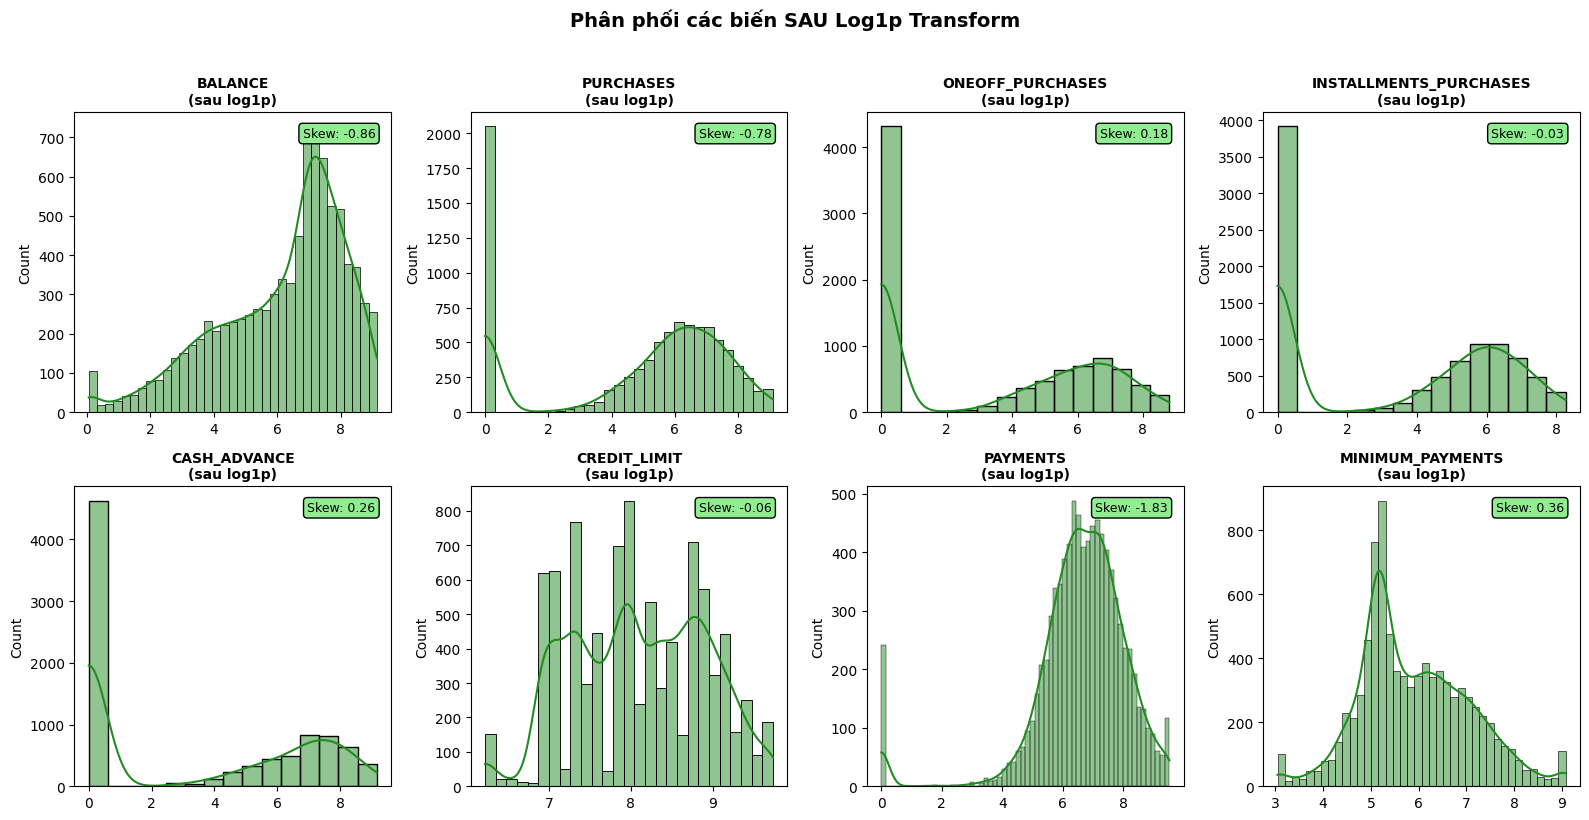

In [18]:
# Visualize phân phối SAU log transform
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(cols_to_log):
    if col in df_processed.columns and idx < len(axes):
        ax = axes[idx]
        sns.histplot(df_processed[col], kde=True, ax=ax, color='forestgreen', edgecolor='black')
        ax.set_title(f'{col}\n(sau log1p)', fontsize=10, fontweight='bold')
        ax.set_xlabel('')
        
        # Thêm skewness
        skew_val = df_processed[col].skew()
        ax.text(0.95, 0.95, f'Skew: {skew_val:.2f}', transform=ax.transAxes,
                ha='right', va='top', fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgreen'))

plt.suptitle('Phân phối các biến SAU Log1p Transform', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### **2.4 Feature Selection - Xử lý đa cộng tuyến**

BƯỚC 5: FEATURE SELECTION - XỬ LÝ ĐA CỘNG TUYẾN

[INFO] 5.1 Phan tich tuong quan cao (|r| > 0.85):
------------------------------------------------------------


,Feature 1,Feature 2,Correlation
0,INSTALLMENTS_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,0.878963
1,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,0.862934


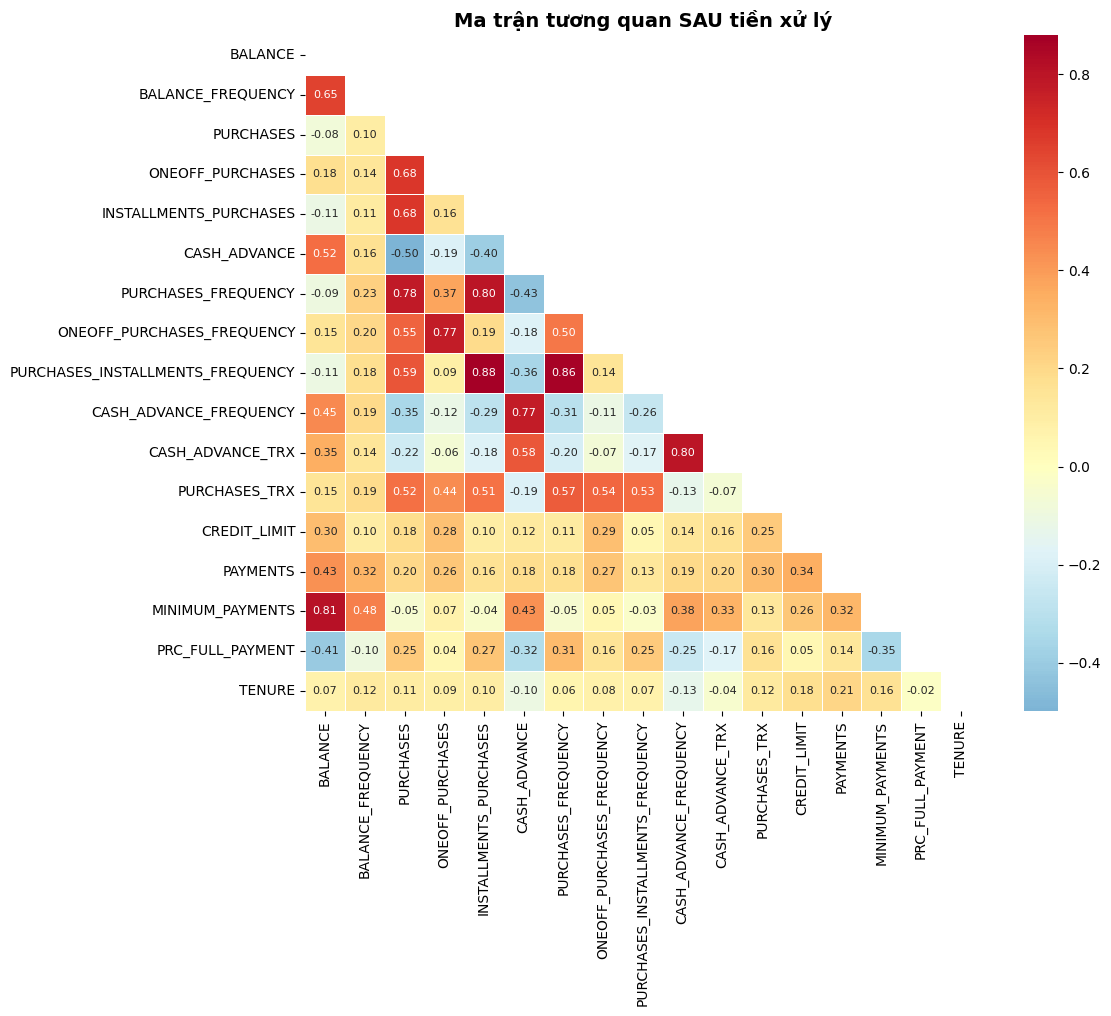


[INFO] 5.2 Phan tich cac cap bien co tuong quan cao:
------------------------------------------------------------
Cac cap bien co |r| > 0.7:
   - INSTALLMENTS_PURCHASES <-> PURCHASES_INSTALLMENTS_FREQUENCY: r = 0.879
   - PURCHASES_FREQUENCY <-> PURCHASES_INSTALLMENTS_FREQUENCY: r = 0.863
   - BALANCE <-> MINIMUM_PAYMENTS: r = 0.809
   - CASH_ADVANCE_FREQUENCY <-> CASH_ADVANCE_TRX: r = 0.8
   - INSTALLMENTS_PURCHASES <-> PURCHASES_FREQUENCY: r = 0.795
   - PURCHASES <-> PURCHASES_FREQUENCY: r = 0.782
   - ONEOFF_PURCHASES <-> ONEOFF_PURCHASES_FREQUENCY: r = 0.769
   - CASH_ADVANCE <-> CASH_ADVANCE_FREQUENCY: r = 0.769


In [19]:
# ============================================================================
# BƯỚC 5: FEATURE SELECTION - XỬ LÝ ĐA CỘNG TUYẾN
# ============================================================================

print("=" * 60)
print("BƯỚC 5: FEATURE SELECTION - XỬ LÝ ĐA CỘNG TUYẾN")
print("=" * 60)

# 5.1 Kiem tra tuong quan cao
print("\n[INFO] 5.1 Phan tich tuong quan cao (|r| > 0.85):")
print("-" * 60)

corr_matrix = df_processed.corr()
high_corr_features = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            high_corr_features.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_features:
    high_corr_table = pd.DataFrame(high_corr_features)
    display(high_corr_table.sort_values('Correlation', ascending=False))
else:
    print("   Không có cặp biến nào có tương quan > 0.85")

# 5.2 Vẽ ma trận tương quan sau xử lý
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlBu_r',
            center=0, square=True, linewidths=0.5, annot_kws={"size": 8})
plt.title('Ma trận tương quan SAU tiền xử lý', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5.3 Phan tich cac cap tuong quan cao
print("\n[INFO] 5.2 Phan tich cac cap bien co tuong quan cao:")
print("-" * 60)

# Tim cac cap co correlation > 0.7
high_corr_07 = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_07.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': round(corr_matrix.iloc[i, j], 3)
            })

if high_corr_07:
    print("Cac cap bien co |r| > 0.7:")
    for pair in sorted(high_corr_07, key=lambda x: abs(x['Correlation']), reverse=True):
        print(f"   - {pair['Feature 1']} <-> {pair['Feature 2']}: r = {pair['Correlation']}")
else:
    print("   Khong co cap bien nao co tuong quan > 0.7")

In [20]:
# ============================================================================
# 5.3 QUYẾT ĐỊNH LOẠI BỎ BIẾN (Dựa trên phân tích)
# ============================================================================

print("=" * 60)
print("5.3 QUYẾT ĐỊNH LOẠI BỎ BIẾN")
print("=" * 60)

# Các biến thường nên loại bỏ dựa trên domain knowledge và multicollinearity:
# - PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES (redundant)
# - PURCHASES_TRX có tương quan cao với PURCHASES
# - Có thể giữ lại PURCHASES hoặc giữ riêng 2 thành phần

# Lựa chọn: Loại bỏ PURCHASES (giữ lại ONEOFF và INSTALLMENTS để có thông tin chi tiết hơn)
features_to_drop = []

# Kiểm tra và quyết định
if 'PURCHASES' in df_processed.columns:
    # Nếu PURCHASES = ONEOFF + INSTALLMENTS, ta có thể bỏ PURCHASES
    has_components = ('ONEOFF_PURCHASES' in df_processed.columns and 
                      'INSTALLMENTS_PURCHASES' in df_processed.columns)
    if has_components:
        features_to_drop.append('PURCHASES')
        print("[OK] Loai bo 'PURCHASES' - la tong cua ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES")

# Thuc hien loai bo
if features_to_drop:
    df_processed = df_processed.drop(columns=features_to_drop)
    print(f"\n[INFO] Da loai bo {len(features_to_drop)} bien: {features_to_drop}")
else:
    print("[INFO] Khong can loai bo bien nao - cac bien du doc lap")

print(f"\n[OK] So features con lai: {df_processed.shape[1]}")
print(f"[OK] Danh sach features: {list(df_processed.columns)}")

5.3 QUYẾT ĐỊNH LOẠI BỎ BIẾN
[OK] Loai bo 'PURCHASES' - la tong cua ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES

[INFO] Da loai bo 1 bien: ['PURCHASES']

[OK] So features con lai: 16
[OK] Danh sach features: ['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


### **2.5 Chuẩn hóa dữ liệu (Scaling)**

In [21]:
# ============================================================================
# BƯỚC 6: CHUẨN HÓA DỮ LIỆU - STANDARD SCALER
# ============================================================================

print("=" * 60)
print("BƯỚC 6: CHUẨN HÓA DỮ LIỆU - STANDARD SCALER")
print("=" * 60)

print("\n[INFO] Phuong phap: StandardScaler (Z-score normalization)")
print("   Chuyen doi: z = (x - mean) / std")
print("   Ket qua: mean = 0, std = 1 cho moi feature")
print("   Tai sao can: K-Means su dung khoang cach Euclidean, nhay voi scale")

# Luu ten cot
feature_names = df_processed.columns.tolist()

# Ap dung StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_processed)

# Tao DataFrame voi du lieu da scale
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)

# Kiem tra ket qua
print("\n[INFO] Thong ke SAU khi chuan hoa:")
print("-" * 60)
scaled_stats = df_scaled.describe().T[['mean', 'std', 'min', 'max']]
display(scaled_stats.round(4))

print("\n[OK] Hoan thanh chuan hoa du lieu!")
print(f"[OK] Shape du lieu cuoi cung: {df_scaled.shape}")

BƯỚC 6: CHUẨN HÓA DỮ LIỆU - STANDARD SCALER

[INFO] Phuong phap: StandardScaler (Z-score normalization)
   Chuyen doi: z = (x - mean) / std
   Ket qua: mean = 0, std = 1 cho moi feature
   Tai sao can: K-Means su dung khoang cach Euclidean, nhay voi scale

[INFO] Thong ke SAU khi chuan hoa:
------------------------------------------------------------


,mean,std,min,max
BALANCE,-0.0,1.0001,-3.0364,1.4850
BALANCE_FREQUENCY,0.0,1.0001,-3.7033,0.5181
ONEOFF_PURCHASES,0.0,1.0001,-0.9884,1.7327
INSTALLMENTS_PURCHASES,0.0,1.0001,-1.0887,1.5990
CASH_ADVANCE,0.0,1.0001,-0.9313,1.6436
PURCHASES_FREQUENCY,-0.0,1.0001,-1.2218,1.2698
ONEOFF_PURCHASES_FREQUENCY,-0.0,1.0001,-0.6787,2.6735
PURCHASES_INSTALLMENTS_FREQUENCY,0.0,1.0001,-0.9170,1.5992
CASH_ADVANCE_FREQUENCY,0.0,1.0001,-0.6753,6.8205
CASH_ADVANCE_TRX,-0.0,1.0001,-0.4761,17.5478



[OK] Hoan thanh chuan hoa du lieu!
[OK] Shape du lieu cuoi cung: (8950, 16)


### **2.6 Giảm chiều với PCA (Principal Component Analysis)**

BƯỚC 7: GIẢM CHIỀU VỚI PCA

[INFO] Muc dich PCA:
   1. Truc quan hoa du lieu da chieu (2D/3D)
   2. Giam nhieu, tap trung vao thong tin quan trong
   3. Tang toc do training cho cac mo hinh clustering


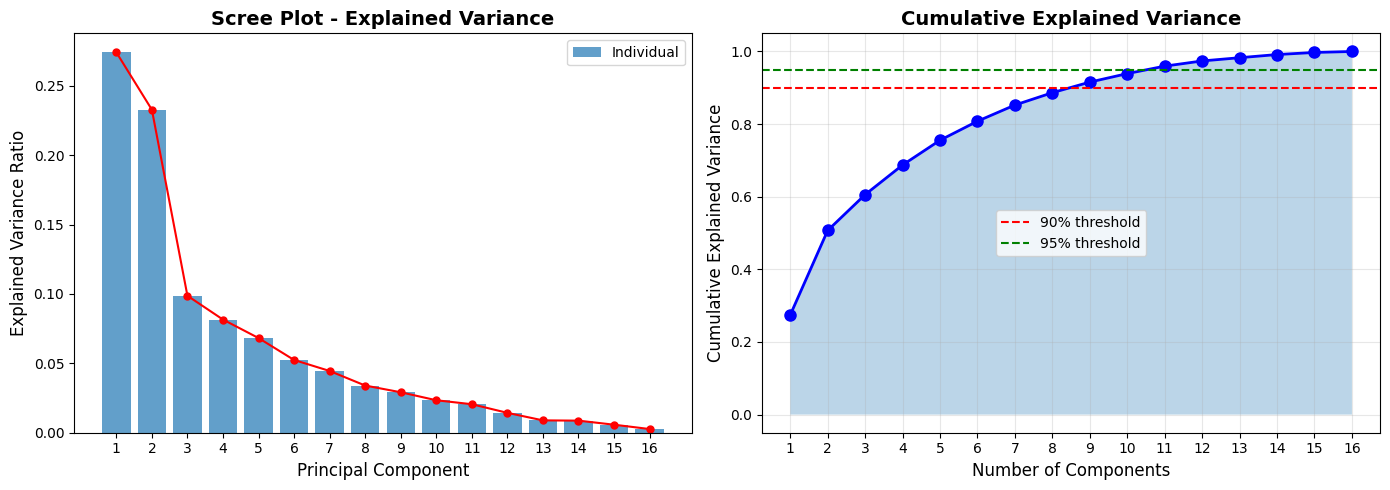


[INFO] Phan tich Explained Variance:
--------------------------------------------------
PC1: 0.2742 (27.42%) | Cumulative: 27.42%
PC2: 0.2328 (23.28%) | Cumulative: 50.70%
PC3: 0.0987 (9.87%) | Cumulative: 60.57%
PC4: 0.0816 (8.16%) | Cumulative: 68.73%
PC5: 0.0682 (6.82%) | Cumulative: 75.55%
PC6: 0.0524 (5.24%) | Cumulative: 80.80%
PC7: 0.0445 (4.45%) | Cumulative: 85.25%
PC8: 0.0340 (3.40%) | Cumulative: 88.65%
PC9: 0.0292 (2.92%) | Cumulative: 91.57%
PC10: 0.0234 (2.34%) | Cumulative: 93.91%
PC11: 0.0205 (2.05%) | Cumulative: 95.96%
PC12: 0.0143 (1.43%) | Cumulative: 97.39%
PC13: 0.0089 (0.89%) | Cumulative: 98.29%
PC14: 0.0087 (0.87%) | Cumulative: 99.16%
PC15: 0.0058 (0.58%) | Cumulative: 99.73%
PC16: 0.0027 (0.27%) | Cumulative: 100.00%
--------------------------------------------------

[OK] Can 9 components de giai thich 90% variance
[OK] Can 11 components de giai thich 95% variance


In [22]:
# ============================================================================
# BƯỚC 7: GIẢM CHIỀU VỚI PCA
# ============================================================================

print("=" * 60)
print("BƯỚC 7: GIẢM CHIỀU VỚI PCA")
print("=" * 60)

print("\n[INFO] Muc dich PCA:")
print("   1. Truc quan hoa du lieu da chieu (2D/3D)")
print("   2. Giam nhieu, tap trung vao thong tin quan trong")
print("   3. Tang toc do training cho cac mo hinh clustering")

# Phân tích PCA đầy đủ để xem explained variance
pca_full = PCA()
pca_full.fit(X_scaled)

# Tính cumulative explained variance
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Vẽ biểu đồ Explained Variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
ax1 = axes[0]
ax1.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, label='Individual')
ax1.plot(range(1, len(explained_variance)+1), explained_variance, 'ro-', markersize=5)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Scree Plot - Explained Variance', fontsize=14, fontweight='bold')
ax1.set_xticks(range(1, len(explained_variance)+1))
ax1.legend()

# Cumulative explained variance
ax2 = axes[1]
ax2.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'b-o', markersize=8, linewidth=2)
ax2.axhline(y=0.90, color='r', linestyle='--', label='90% threshold')
ax2.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
ax2.fill_between(range(1, len(cumulative_variance)+1), cumulative_variance, alpha=0.3)
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.set_xticks(range(1, len(cumulative_variance)+1))
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Xác định số components cần thiết cho 90% và 95% variance
n_comp_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_comp_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\n[INFO] Phan tich Explained Variance:")
print("-" * 50)
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {ev:.4f} ({ev*100:.2f}%) | Cumulative: {cv*100:.2f}%")
print("-" * 50)
print(f"\n[OK] Can {n_comp_90} components de giai thich 90% variance")
print(f"[OK] Can {n_comp_95} components de giai thich 95% variance")

TẠO CÁC PHIÊN BẢN DỮ LIỆU CHO CLUSTERING

[OK] X_full: Du lieu da scale day du - Shape: (8950, 16)
[OK] X_pca_2d: PCA 2D cho truc quan hoa - Shape: (8950, 2)
   Explained variance: 50.70%
[OK] X_pca_3d: PCA 3D cho truc quan hoa - Shape: (8950, 3)
   Explained variance: 60.57%
[OK] X_pca_90: PCA 90% variance cho clustering - Shape: (8950, 9)
   So components: 9
   Explained variance: 91.57%


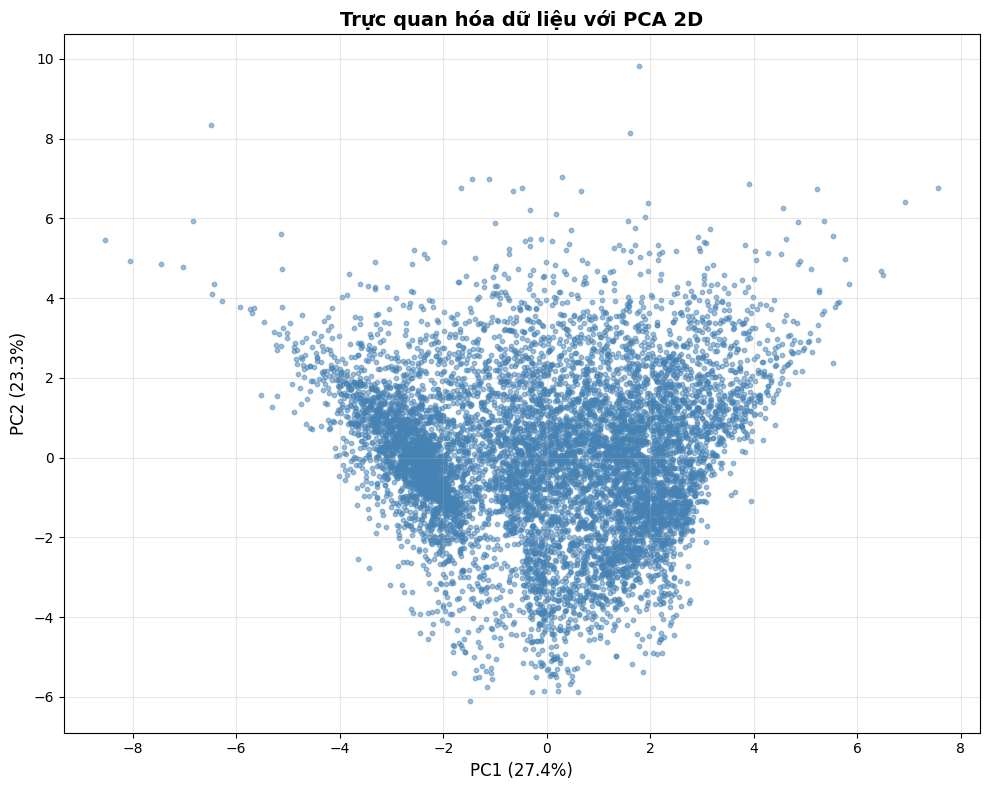


HOAN THANH TIEN XU LY DU LIEU!

[INFO] Du lieu san sang cho Clustering:
   - df_processed: DataFrame da xu ly (truoc scale)
   - X_full: Du lieu da scale day du (8950, 16)
   - X_pca_2d: PCA 2D cho truc quan hoa (8950, 2)
   - X_pca_3d: PCA 3D cho truc quan hoa (8950, 3)
   - X_pca_90: PCA 90% variance cho clustering (8950, 9)
   - feature_names: Danh sach ten features
   - scaler: StandardScaler object (de inverse transform neu can)


In [23]:
# ============================================================================
# TẠO CÁC PHIÊN BẢN DỮ LIỆU CHO CLUSTERING
# ============================================================================

print("=" * 60)
print("TẠO CÁC PHIÊN BẢN DỮ LIỆU CHO CLUSTERING")
print("=" * 60)

# 1. Du lieu da scale day du (cho clustering tren khong gian goc)
X_full = X_scaled.copy()
print(f"\n[OK] X_full: Du lieu da scale day du - Shape: {X_full.shape}")

# 2. PCA giam xuong de truc quan hoa 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
print(f"[OK] X_pca_2d: PCA 2D cho truc quan hoa - Shape: {X_pca_2d.shape}")
print(f"   Explained variance: {pca_2d.explained_variance_ratio_.sum()*100:.2f}%")

# 3. PCA giam xuong de truc quan hoa 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)
print(f"[OK] X_pca_3d: PCA 3D cho truc quan hoa - Shape: {X_pca_3d.shape}")
print(f"   Explained variance: {pca_3d.explained_variance_ratio_.sum()*100:.2f}%")

# 4. PCA voi 90% variance (cho clustering)
pca_90 = PCA(n_components=0.90)
X_pca_90 = pca_90.fit_transform(X_scaled)
print(f"[OK] X_pca_90: PCA 90% variance cho clustering - Shape: {X_pca_90.shape}")
print(f"   So components: {pca_90.n_components_}")
print(f"   Explained variance: {pca_90.explained_variance_ratio_.sum()*100:.2f}%")

# Vẽ trực quan hóa 2D PCA
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5, s=10, c='steelblue')
ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax.set_title('Trực quan hóa dữ liệu với PCA 2D', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("HOAN THANH TIEN XU LY DU LIEU!")
print("=" * 60)
print("\n[INFO] Du lieu san sang cho Clustering:")
print(f"   - df_processed: DataFrame da xu ly (truoc scale)")
print(f"   - X_full: Du lieu da scale day du {X_full.shape}")
print(f"   - X_pca_2d: PCA 2D cho truc quan hoa {X_pca_2d.shape}")
print(f"   - X_pca_3d: PCA 3D cho truc quan hoa {X_pca_3d.shape}")
print(f"   - X_pca_90: PCA 90% variance cho clustering {X_pca_90.shape}")
print(f"   - feature_names: Danh sach ten features")
print(f"   - scaler: StandardScaler object (de inverse transform neu can)")

### **2.7 Tóm tắt Pipeline Tiền Xử Lý**

                    TÓM TẮT PIPELINE TIỀN XỬ LÝ


,Bước,Phương pháp,Lý do
0,1. Drop ID,Loại bỏ CUST_ID,"Định danh, không có ý nghĩa phân cụm"
1,2. Missing Values,Điền Median,Robust với outliers
2,3. Outliers (Winsorize),Clip percentile 1%-99%,"Giữ dữ liệu, giảm extreme values"
3,4. Log Transform,log1p() cho biến amount,Giảm skewness cho K-Means
4,5. Feature Selection,Loại biến đa cộng tuyến,"Giảm redundancy, tăng interpretability"
5,6. Scaling,StandardScaler,K-Means nhạy với scale
6,7. PCA,Giảm chiều,Trực quan + giảm nhiễu


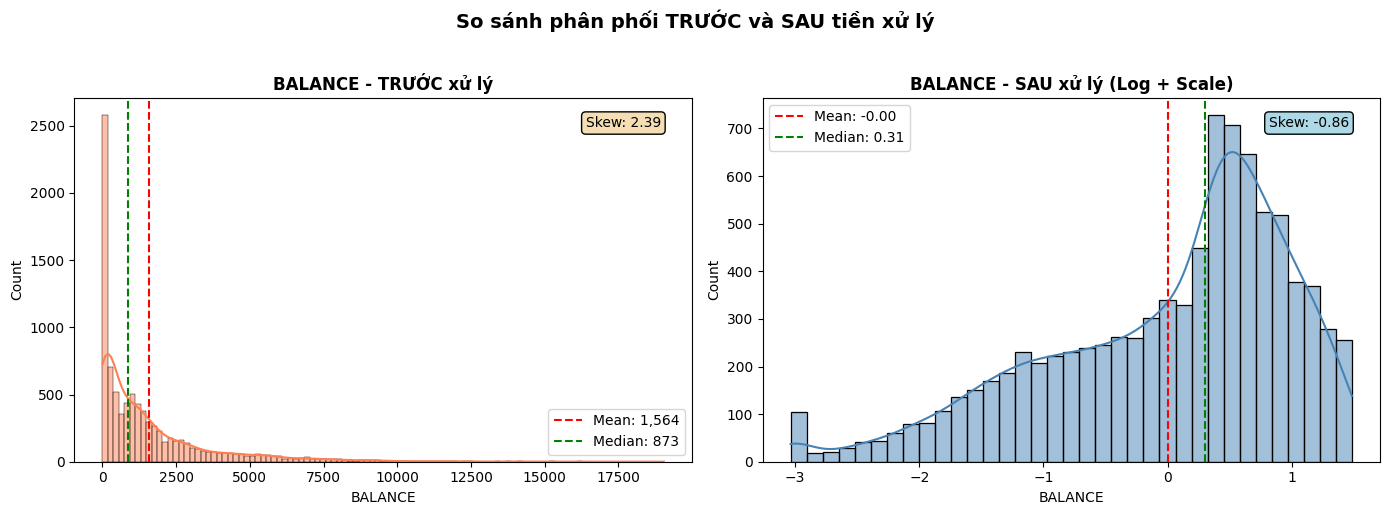

In [24]:
# ============================================================================
# TÓM TẮT PIPELINE TIỀN XỬ LÝ
# ============================================================================

summary_data = {
    'Bước': [
        '1. Drop ID',
        '2. Missing Values',
        '3. Outliers (Winsorize)',
        '4. Log Transform',
        '5. Feature Selection',
        '6. Scaling',
        '7. PCA'
    ],
    'Phương pháp': [
        'Loại bỏ CUST_ID',
        'Điền Median',
        'Clip percentile 1%-99%',
        'log1p() cho biến amount',
        'Loại biến đa cộng tuyến',
        'StandardScaler',
        'Giảm chiều'
    ],
    'Lý do': [
        'Định danh, không có ý nghĩa phân cụm',
        'Robust với outliers',
        'Giữ dữ liệu, giảm extreme values',
        'Giảm skewness cho K-Means',
        'Giảm redundancy, tăng interpretability',
        'K-Means nhạy với scale',
        'Trực quan + giảm nhiễu'
    ]
}

summary_df = pd.DataFrame(summary_data)

print("=" * 80)
print("                    TÓM TẮT PIPELINE TIỀN XỬ LÝ")
print("=" * 80)
display(summary_df)

# Tạo biểu đồ so sánh trước/sau
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Trước xử lý - lấy một biến mẫu từ df gốc (BALANCE)
ax1 = axes[0]
if 'BALANCE' in df.columns:
    sns.histplot(df['BALANCE'], kde=True, ax=ax1, color='coral', edgecolor='black')
    ax1.set_title('BALANCE - TRƯỚC xử lý', fontsize=12, fontweight='bold')
    ax1.axvline(df['BALANCE'].mean(), color='red', linestyle='--', label=f"Mean: {df['BALANCE'].mean():,.0f}")
    ax1.axvline(df['BALANCE'].median(), color='green', linestyle='--', label=f"Median: {df['BALANCE'].median():,.0f}")
    ax1.legend()
    ax1.text(0.95, 0.95, f"Skew: {df['BALANCE'].skew():.2f}", transform=ax1.transAxes,
             ha='right', va='top', bbox=dict(boxstyle='round', facecolor='wheat'))

# Sau xử lý
ax2 = axes[1]
if 'BALANCE' in df_scaled.columns:
    sns.histplot(df_scaled['BALANCE'], kde=True, ax=ax2, color='steelblue', edgecolor='black')
    ax2.set_title('BALANCE - SAU xử lý (Log + Scale)', fontsize=12, fontweight='bold')
    ax2.axvline(df_scaled['BALANCE'].mean(), color='red', linestyle='--', label=f"Mean: {df_scaled['BALANCE'].mean():.2f}")
    ax2.axvline(df_scaled['BALANCE'].median(), color='green', linestyle='--', label=f"Median: {df_scaled['BALANCE'].median():.2f}")
    ax2.legend()
    ax2.text(0.95, 0.95, f"Skew: {df_scaled['BALANCE'].skew():.2f}", transform=ax2.transAxes,
             ha='right', va='top', bbox=dict(boxstyle='round', facecolor='lightblue'))

plt.suptitle('So sánh phân phối TRƯỚC và SAU tiền xử lý', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## **3. Modeling**

### **3.1 K-Means Clustering**

K-Means là thuật toán clustering phổ biến nhất, hoạt động bằng cách:
1. Khởi tạo k centroid ngẫu nhiên
2. Gán mỗi điểm vào cluster gần nhất
3. Cập nhật centroid = trung bình các điểm trong cluster
4. Lặp lại cho đến khi hội tụ

**Ưu điểm**: Nhanh, đơn giản, hiệu quả với dữ liệu lớn
**Nhược điểm**: Cần chọn k trước, nhạy với outliers và khởi tạo

#### **3.1.1 Xac dinh so cum toi uu (k)**

Su dung 4 phuong phap:
1. **Elbow Method** (Inertia) - Tim diem "khuyu tay"
2. **Silhouette Score** - Do phan tach cac cum (-1 den 1, cang cao cang tot)
3. **Calinski-Harabasz Index** - Ty le phuong sai giua/trong cum (cang cao cang tot)
4. **Davies-Bouldin Index** - Do tuong tu giua cac cum (cang thap cang tot)

In [25]:
# ============================================================================
# TINH TOAN CAC METRICS DE CHON SO CUM TOI UU
# ============================================================================

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print("=" * 70)
print("3.1.1 XAC DINH SO CUM TOI UU CHO K-MEANS")
print("=" * 70)

# Khoang gia tri k can thu
k_range = range(2, 11)

# Luu ket qua
inertias = []
silhouettes = []
calinski_scores = []
davies_bouldin_scores = []

print("\n[INFO] Dang tinh toan cac metrics cho k = 2 den 10...")
print("-" * 70)

for k in k_range:
    # Train K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_pca_90)
    
    # Tinh cac metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_pca_90, labels)
    calinski = calinski_harabasz_score(X_pca_90, labels)
    davies = davies_bouldin_score(X_pca_90, labels)
    
    # Luu ket qua
    inertias.append(inertia)
    silhouettes.append(silhouette)
    calinski_scores.append(calinski)
    davies_bouldin_scores.append(davies)
    
    print(f"k={k}: Inertia={inertia:,.0f} | Silhouette={silhouette:.4f} | "
          f"Calinski={calinski:,.0f} | Davies-Bouldin={davies:.4f}")

print("-" * 70)
print("[OK] Hoan thanh tinh toan!")

3.1.1 XAC DINH SO CUM TOI UU CHO K-MEANS

[INFO] Dang tinh toan cac metrics cho k = 2 den 10...
----------------------------------------------------------------------
k=2: Inertia=102,397 | Silhouette=0.2216 | Calinski=2,510 | Davies-Bouldin=1.7106
k=3: Inertia=84,864 | Silhouette=0.2314 | Calinski=2,439 | Davies-Bouldin=1.5552
k=4: Inertia=75,635 | Silhouette=0.2297 | Calinski=2,188 | Davies-Bouldin=1.5210
k=5: Inertia=68,327 | Silhouette=0.2103 | Calinski=2,055 | Davies-Bouldin=1.5303
k=6: Inertia=63,323 | Silhouette=0.2093 | Calinski=1,915 | Davies-Bouldin=1.4527
k=7: Inertia=58,943 | Silhouette=0.2177 | Calinski=1,825 | Davies-Bouldin=1.3684
k=8: Inertia=55,016 | Silhouette=0.2144 | Calinski=1,767 | Davies-Bouldin=1.3407
k=9: Inertia=52,138 | Silhouette=0.2122 | Calinski=1,693 | Davies-Bouldin=1.3506
k=10: Inertia=50,490 | Silhouette=0.2086 | Calinski=1,586 | Davies-Bouldin=1.3483
----------------------------------------------------------------------
[OK] Hoan thanh tinh toan!


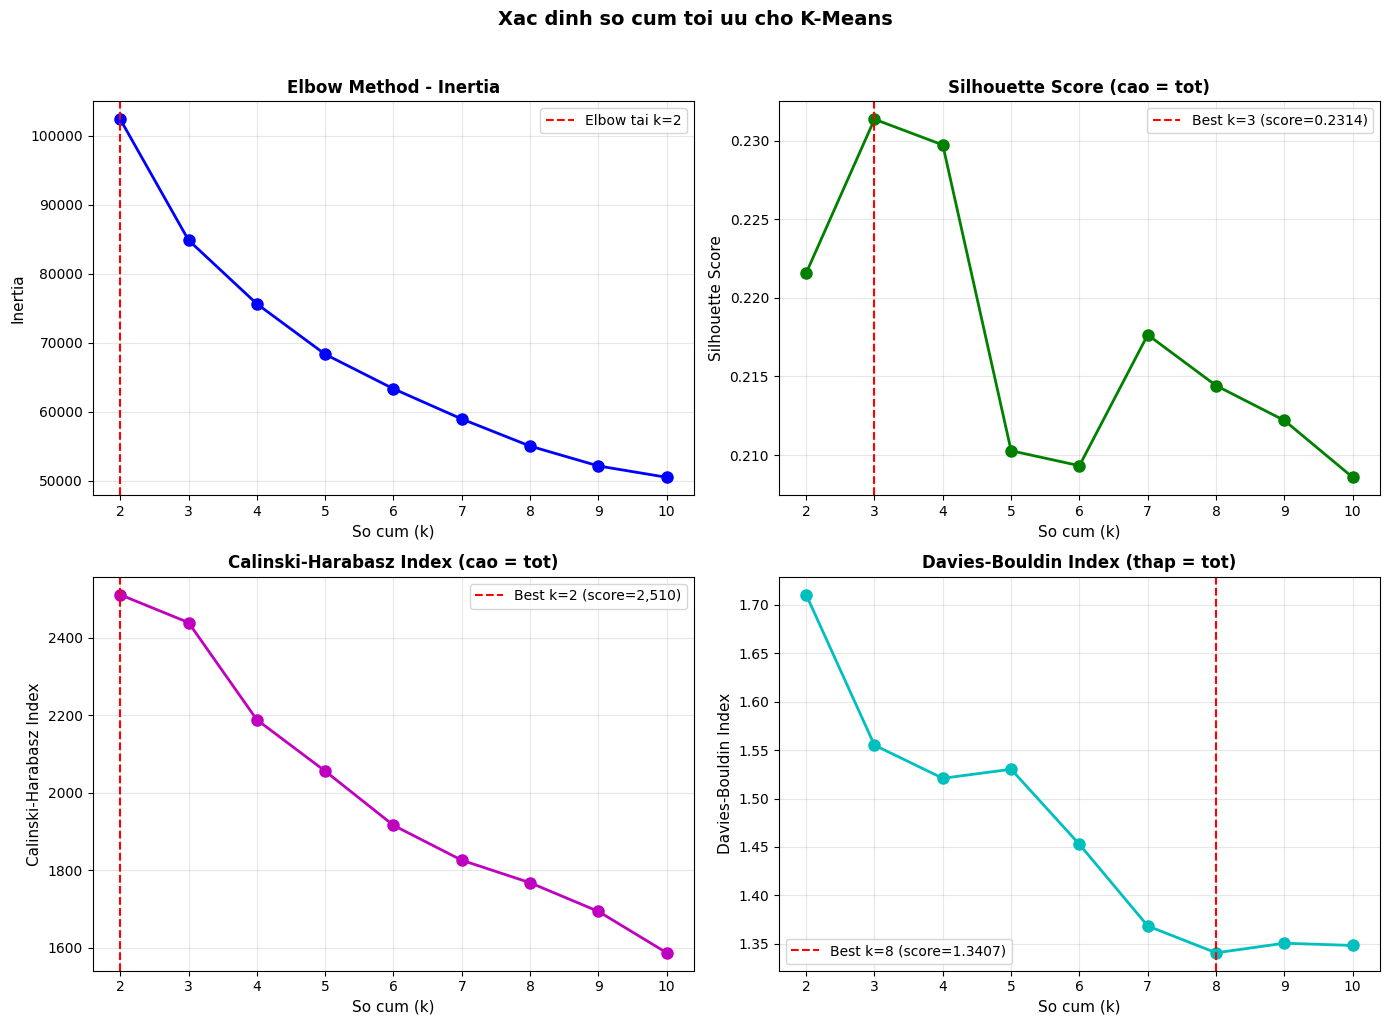

In [26]:
# ============================================================================
# TRUC QUAN HOA CAC METRICS
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Elbow Method (Inertia)
ax1 = axes[0, 0]
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('So cum (k)', fontsize=11)
ax1.set_ylabel('Inertia', fontsize=11)
ax1.set_title('Elbow Method - Inertia', fontsize=12, fontweight='bold')
ax1.set_xticks(list(k_range))
ax1.grid(True, alpha=0.3)

# Tim diem elbow (su dung phuong phap do goc)
# Tinh do giam inertia
inertia_diff = np.diff(inertias)
inertia_diff2 = np.diff(inertia_diff)
elbow_idx = np.argmax(inertia_diff2) + 2  # +2 vi diff giam 1 index 2 lan
ax1.axvline(x=elbow_idx, color='red', linestyle='--', label=f'Elbow tai k={elbow_idx}')
ax1.legend()

# 2. Silhouette Score
ax2 = axes[0, 1]
ax2.plot(k_range, silhouettes, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('So cum (k)', fontsize=11)
ax2.set_ylabel('Silhouette Score', fontsize=11)
ax2.set_title('Silhouette Score (cao = tot)', fontsize=12, fontweight='bold')
ax2.set_xticks(list(k_range))
ax2.grid(True, alpha=0.3)

# Danh dau k tot nhat
best_silhouette_k = k_range[np.argmax(silhouettes)]
ax2.axvline(x=best_silhouette_k, color='red', linestyle='--', 
            label=f'Best k={best_silhouette_k} (score={max(silhouettes):.4f})')
ax2.legend()

# 3. Calinski-Harabasz Index
ax3 = axes[1, 0]
ax3.plot(k_range, calinski_scores, 'mo-', linewidth=2, markersize=8)
ax3.set_xlabel('So cum (k)', fontsize=11)
ax3.set_ylabel('Calinski-Harabasz Index', fontsize=11)
ax3.set_title('Calinski-Harabasz Index (cao = tot)', fontsize=12, fontweight='bold')
ax3.set_xticks(list(k_range))
ax3.grid(True, alpha=0.3)

best_calinski_k = k_range[np.argmax(calinski_scores)]
ax3.axvline(x=best_calinski_k, color='red', linestyle='--',
            label=f'Best k={best_calinski_k} (score={max(calinski_scores):,.0f})')
ax3.legend()

# 4. Davies-Bouldin Index
ax4 = axes[1, 1]
ax4.plot(k_range, davies_bouldin_scores, 'co-', linewidth=2, markersize=8)
ax4.set_xlabel('So cum (k)', fontsize=11)
ax4.set_ylabel('Davies-Bouldin Index', fontsize=11)
ax4.set_title('Davies-Bouldin Index (thap = tot)', fontsize=12, fontweight='bold')
ax4.set_xticks(list(k_range))
ax4.grid(True, alpha=0.3)

best_db_k = k_range[np.argmin(davies_bouldin_scores)]
ax4.axvline(x=best_db_k, color='red', linestyle='--',
            label=f'Best k={best_db_k} (score={min(davies_bouldin_scores):.4f})')
ax4.legend()

plt.suptitle('Xac dinh so cum toi uu cho K-Means', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [27]:
# ============================================================================
# TONG HOP KET QUA VA QUYET DINH CHON K
# ============================================================================

print("=" * 70)
print("TONG HOP KET QUA CHON SO CUM TOI UU")
print("=" * 70)

# Tao bang tong hop
metrics_df = pd.DataFrame({
    'k': list(k_range),
    'Inertia': inertias,
    'Silhouette': silhouettes,
    'Calinski-Harabasz': calinski_scores,
    'Davies-Bouldin': davies_bouldin_scores
})

display(metrics_df.round(4))

# Tong hop khuyen nghi tu cac phuong phap
print("\n" + "-" * 70)
print("KHUYEN NGHI TU CAC PHUONG PHAP:")
print("-" * 70)
print(f"  [1] Elbow Method:        k = {elbow_idx}")
print(f"  [2] Silhouette Score:    k = {best_silhouette_k} (max = {max(silhouettes):.4f})")
print(f"  [3] Calinski-Harabasz:   k = {best_calinski_k} (max = {max(calinski_scores):,.0f})")
print(f"  [4] Davies-Bouldin:      k = {best_db_k} (min = {min(davies_bouldin_scores):.4f})")

# Dem so vote cho moi k
votes = {}
for k in [elbow_idx, best_silhouette_k, best_calinski_k, best_db_k]:
    votes[k] = votes.get(k, 0) + 1

best_k = max(votes, key=votes.get)
print(f"\n  --> SO CUM DUOC KHUYEN NGHI: k = {best_k} (duoc {votes[best_k]}/4 phuong phap dong y)")

# Phan tich them Silhouette cho cac k gan toi uu
print("\n" + "-" * 70)
print("PHAN TICH CHI TIET SILHOUETTE:")
print("-" * 70)
for k in range(max(2, best_k-1), min(11, best_k+3)):
    idx = k - 2  # vi k_range bat dau tu 2
    if 0 <= idx < len(silhouettes):
        score = silhouettes[idx]
        if score >= 0.5:
            quality = "MANH (cau truc cum ro rang)"
        elif score >= 0.25:
            quality = "TRUNG BINH (cau truc hop ly)"
        else:
            quality = "YEU (cum chong cheo)"
        marker = " <-- CHON" if k == best_k else ""
        print(f"  k={k}: Silhouette = {score:.4f} - {quality}{marker}")

TONG HOP KET QUA CHON SO CUM TOI UU


,k,Inertia,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,2,102396.8701,0.2216,2510.4113,1.7106
1,3,84863.5631,0.2314,2438.6131,1.5552
2,4,75635.1524,0.2297,2187.7450,1.5210
3,5,68327.3879,0.2103,2055.2659,1.5303
4,6,63322.5728,0.2093,1915.3443,1.4527
5,7,58942.5152,0.2177,1825.2985,1.3684
6,8,55016.0404,0.2144,1767.1842,1.3407
7,9,52137.5830,0.2122,1693.1747,1.3506
8,10,50490.4985,0.2086,1586.3783,1.3483



----------------------------------------------------------------------
KHUYEN NGHI TU CAC PHUONG PHAP:
----------------------------------------------------------------------
  [1] Elbow Method:        k = 2
  [2] Silhouette Score:    k = 3 (max = 0.2314)
  [3] Calinski-Harabasz:   k = 2 (max = 2,510)
  [4] Davies-Bouldin:      k = 8 (min = 1.3407)

  --> SO CUM DUOC KHUYEN NGHI: k = 2 (duoc 2/4 phuong phap dong y)

----------------------------------------------------------------------
PHAN TICH CHI TIET SILHOUETTE:
----------------------------------------------------------------------
  k=2: Silhouette = 0.2216 - YEU (cum chong cheo) <-- CHON
  k=3: Silhouette = 0.2314 - YEU (cum chong cheo)
  k=4: Silhouette = 0.2297 - YEU (cum chong cheo)


#### **3.1.2 Silhouette Analysis chi tiet**

Silhouette plot giup truc quan hoa chat luong tung cum:
- **Chieu rong**: So luong mau trong cum
- **Chieu dai**: Silhouette score cua moi mau
- Duong do: Silhouette trung binh

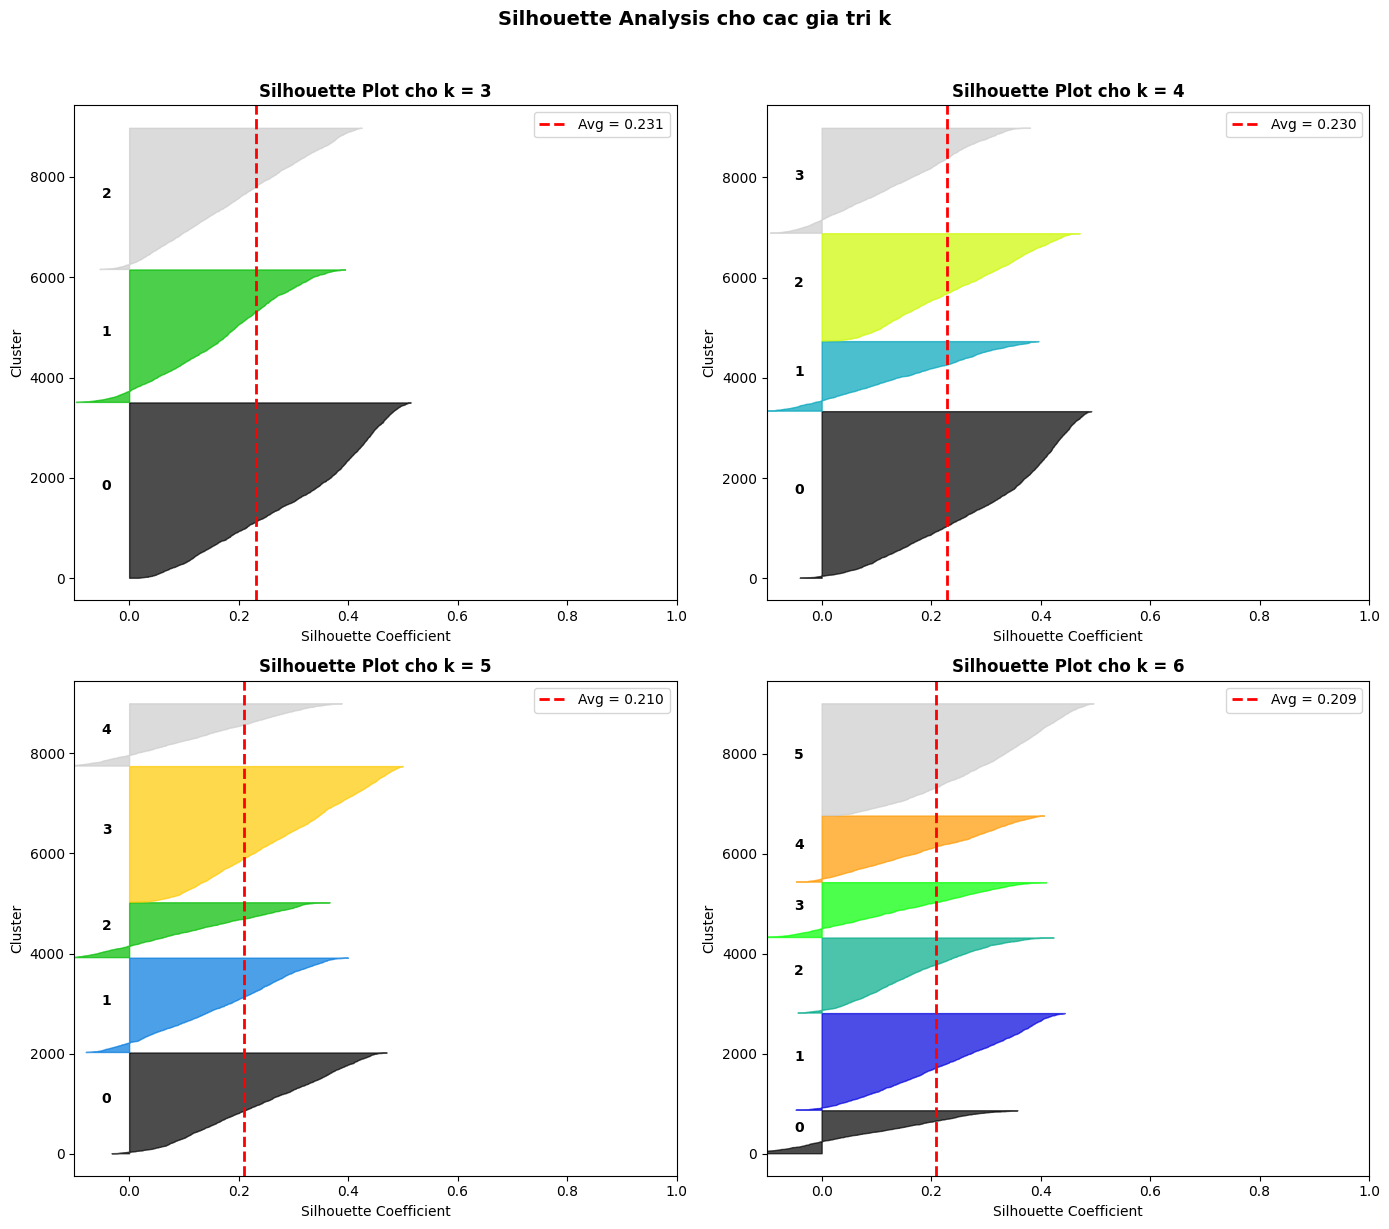


[INFO] Huong dan doc Silhouette Plot:
  - Cac cum co chieu rong DONG DEU = kich thuoc cum can bang
  - Cac thanh VUOT QUA duong do = cum chat luong tot
  - Cac thanh AM (<0) = mau co the bi gan sai cum


In [28]:
# ============================================================================
# SILHOUETTE ANALYSIS CHI TIET CHO CAC GIA TRI K
# ============================================================================

from sklearn.metrics import silhouette_samples

# Chon cac gia tri k can phan tich chi tiet
k_values_to_analyze = [3, 4, 5, 6]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, k in enumerate(k_values_to_analyze):
    ax = axes[idx]
    
    # Train K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca_90)
    
    # Tinh silhouette scores
    silhouette_avg = silhouette_score(X_pca_90, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_pca_90, cluster_labels)
    
    y_lower = 10
    colors_list = plt.cm.nipy_spectral(np.linspace(0, 1, k))
    
    for i in range(k):
        # Lay silhouette values cho cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=colors_list[i], edgecolor=colors_list[i], alpha=0.7)
        
        # Label cluster
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=10, fontweight='bold')
        
        y_lower = y_upper + 10
    
    # Duong trung binh
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2,
               label=f'Avg = {silhouette_avg:.3f}')
    
    ax.set_title(f'Silhouette Plot cho k = {k}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Silhouette Coefficient', fontsize=10)
    ax.set_ylabel('Cluster', fontsize=10)
    ax.set_xlim([-0.1, 1])
    ax.legend(loc='upper right')

plt.suptitle('Silhouette Analysis cho cac gia tri k', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n[INFO] Huong dan doc Silhouette Plot:")
print("  - Cac cum co chieu rong DONG DEU = kich thuoc cum can bang")
print("  - Cac thanh VUOT QUA duong do = cum chat luong tot")
print("  - Cac thanh AM (<0) = mau co the bi gan sai cum")

#### **3.1.3 Train K-Means voi k toi uu**

In [29]:
# ============================================================================
# TRAIN K-MEANS VOI K TOI UU
# ============================================================================

# Chon k toi uu (dua tren phan tich o tren)
# Luu y: k=3 co Silhouette Score cao hon k=4
# Phu hop khi muon cac cum tach biet ro rang hon
optimal_k = 3  # Chon k=3 de toi uu Silhouette Score

print("=" * 70)
print(f"3.1.3 TRAIN K-MEANS VOI k = {optimal_k}")
print("=" * 70)

# Train mo hinh cuoi cung
kmeans_final = KMeans(
    n_clusters=optimal_k,
    init='k-means++',      # Khoi tao thong minh
    n_init=20,             # Chay 20 lan voi khoi tao khac nhau
    max_iter=300,          # So vong lap toi da
    random_state=42        # De ket qua co the tai lap
)

# Fit va predict
kmeans_labels = kmeans_final.fit_predict(X_pca_90)

# Them labels vao DataFrame
df_processed['Cluster'] = kmeans_labels

print(f"\n[OK] Da train K-Means voi k = {optimal_k}")
print(f"\n[INFO] Thong tin mo hinh:")
print(f"   - So cum: {optimal_k}")
print(f"   - So vong lap hoi tu: {kmeans_final.n_iter_}")
print(f"   - Inertia: {kmeans_final.inertia_:,.2f}")

# Thong ke so luong mau trong moi cum
print(f"\n[INFO] Phan phoi mau trong cac cum:")
print("-" * 40)
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
for cluster, count in cluster_counts.items():
    pct = count / len(kmeans_labels) * 100
    print(f"   Cluster {cluster}: {count:,} mau ({pct:.1f}%)")

# Tinh cac metrics
final_silhouette = silhouette_score(X_pca_90, kmeans_labels)
final_calinski = calinski_harabasz_score(X_pca_90, kmeans_labels)
final_davies = davies_bouldin_score(X_pca_90, kmeans_labels)

print(f"\n[INFO] Danh gia chat luong clustering:")
print("-" * 40)
print(f"   Silhouette Score:      {final_silhouette:.4f}")
print(f"   Calinski-Harabasz:     {final_calinski:,.2f}")
print(f"   Davies-Bouldin:        {final_davies:.4f}")

3.1.3 TRAIN K-MEANS VOI k = 3

[OK] Da train K-Means voi k = 3

[INFO] Thong tin mo hinh:
   - So cum: 3
   - So vong lap hoi tu: 17
   - Inertia: 84,863.55

[INFO] Phan phoi mau trong cac cum:
----------------------------------------
   Cluster 0: 2,808 mau (31.4%)
   Cluster 1: 2,653 mau (29.6%)
   Cluster 2: 3,489 mau (39.0%)

[INFO] Danh gia chat luong clustering:
----------------------------------------
   Silhouette Score:      0.2312
   Calinski-Harabasz:     2,438.61
   Davies-Bouldin:        1.5560


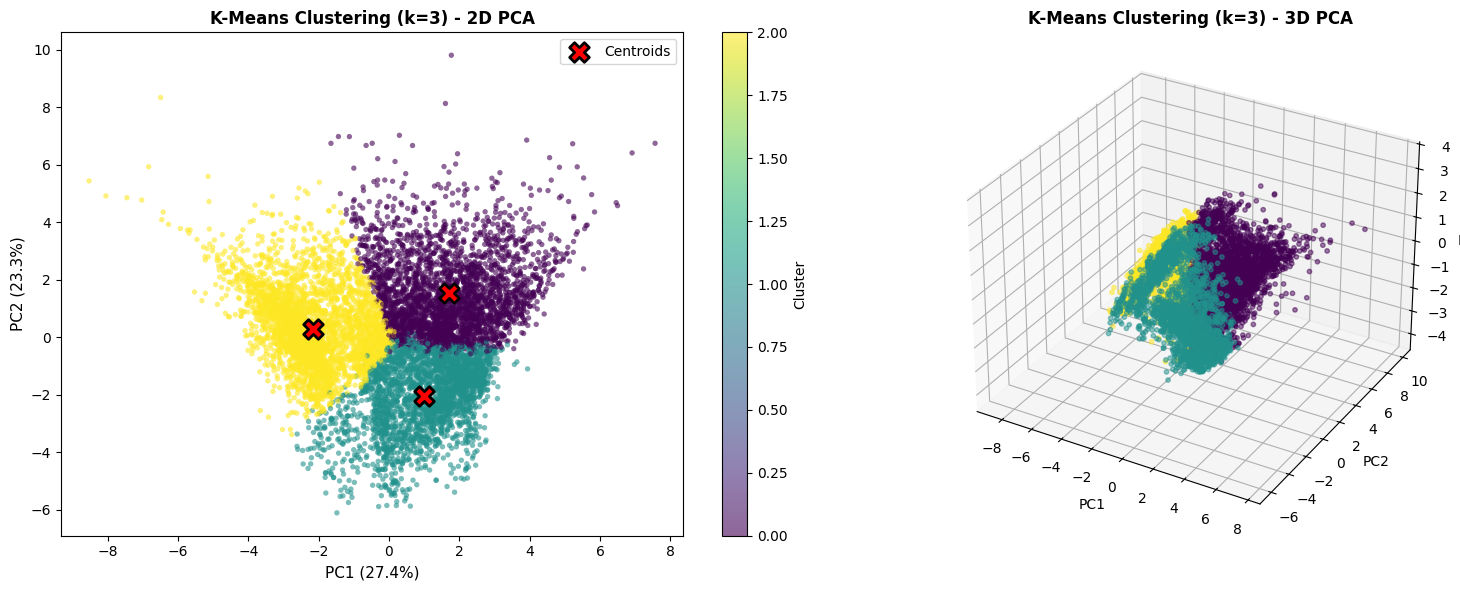


[INFO] Visualization:
   - Mau sac: Cac cum khac nhau
   - Dau X do: Tam cum (centroids)
   - Cac cum TACH BIET = clustering tot


In [30]:
# ============================================================================
# TRUC QUAN HOA KET QUA CLUSTERING (2D va 3D)
# ============================================================================

fig = plt.figure(figsize=(16, 6))

# 1. Visualization 2D
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                      c=kmeans_labels, cmap='viridis', 
                      alpha=0.6, s=15, edgecolors='none')

# Ve centroids (project sang 2D)
pca_2d_model = PCA(n_components=2)
pca_2d_model.fit(X_pca_90)
centroids_2d = pca_2d_model.transform(kmeans_final.cluster_centers_)
ax1.scatter(centroids_2d[:, 0], centroids_2d[:, 1], 
            c='red', marker='X', s=200, edgecolors='black', linewidths=2,
            label='Centroids')

ax1.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax1.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax1.set_title(f'K-Means Clustering (k={optimal_k}) - 2D PCA', fontsize=12, fontweight='bold')
ax1.legend()

# Colorbar
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Cluster', fontsize=10)

# 2. Visualization 3D
ax2 = fig.add_subplot(122, projection='3d')
scatter3d = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                        c=kmeans_labels, cmap='viridis',
                        alpha=0.5, s=10)

ax2.set_xlabel('PC1', fontsize=10)
ax2.set_ylabel('PC2', fontsize=10)
ax2.set_zlabel('PC3', fontsize=10)
ax2.set_title(f'K-Means Clustering (k={optimal_k}) - 3D PCA', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n[INFO] Visualization:")
print("   - Mau sac: Cac cum khac nhau")
print("   - Dau X do: Tam cum (centroids)")
print("   - Cac cum TACH BIET = clustering tot")

#### **3.1.4 Phan tich dac trung tung cum**

In [31]:
# ============================================================================
# PHAN TICH DAC TRUNG TUNG CUM (Tren du lieu GOC truoc scale)
# ============================================================================

print("=" * 70)
print("3.1.4 PHAN TICH DAC TRUNG TUNG CUM")
print("=" * 70)

# Them cluster labels vao du lieu goc
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = kmeans_labels

# Tinh mean cua tung cluster
cluster_profile = df_with_clusters.groupby('Cluster').mean(numeric_only=True)

print("\n[INFO] Gia tri TRUNG BINH cua tung cum (du lieu goc):")
display(cluster_profile.round(2))

# Tinh median de so sanh (robust hon voi outliers)
cluster_median = df_with_clusters.groupby('Cluster').median(numeric_only=True)
print("\n[INFO] Gia tri MEDIAN cua tung cum:")
display(cluster_median.round(2))

3.1.4 PHAN TICH DAC TRUNG TUNG CUM

[INFO] Gia tri TRUNG BINH cua tung cum (du lieu goc):


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,1931.65,0.98,2474.23,1512.33,962.18,597.00,0.88,0.48,0.66,0.08,1.91,35.89,5867.00,2692.33,1150.26,0.18,11.85
1,133.68,0.68,455.21,153.05,302.70,63.43,0.54,0.07,0.45,0.01,0.23,8.32,3274.91,689.29,159.07,0.29,11.32
2,2356.93,0.94,235.99,186.20,49.93,1982.30,0.14,0.07,0.06,0.27,6.62,2.53,4316.77,1754.92,1125.30,0.03,11.40



[INFO] Gia tri MEDIAN cua tung cum:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,1167.15,1.00,1603.79,815.86,577.51,0.00,1.0,0.42,0.75,0.00,0.0,25.0,5000.0,1660.29,438.70,0.00,12.0
1,45.46,0.73,302.91,0.00,178.80,0.00,0.5,0.00,0.42,0.00,0.0,7.0,2500.0,383.10,139.90,0.09,12.0
2,1599.31,1.00,0.00,0.00,0.00,1147.89,0.0,0.00,0.00,0.25,4.0,0.0,3000.0,848.63,568.67,0.00,12.0


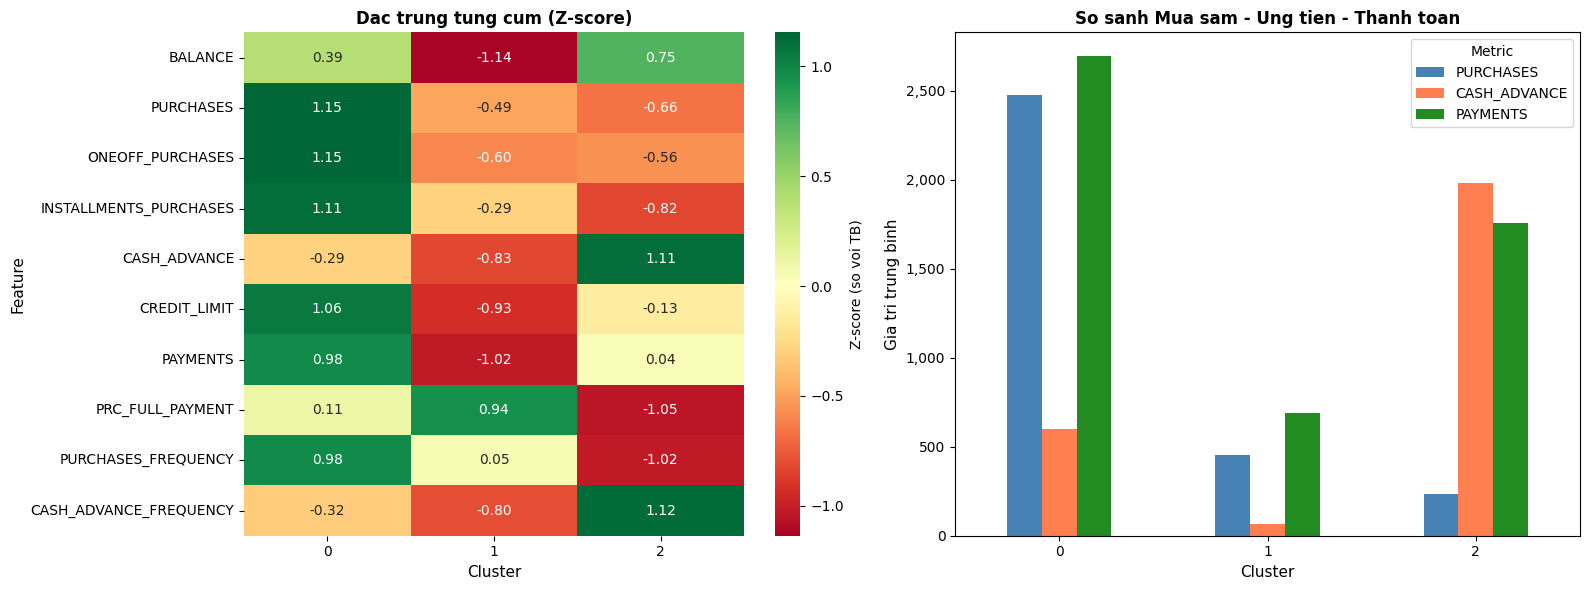

In [32]:
# ============================================================================
# TRUC QUAN HOA DAC TRUNG TUNG CUM
# ============================================================================

# Chon cac bien quan trong de phan tich
key_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT',
                'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']

# Chi lay cac bien co trong df
key_features = [f for f in key_features if f in df_with_clusters.columns]

# Tinh gia tri trung binh cho moi cluster (chuan hoa de so sanh)
cluster_means = df_with_clusters.groupby('Cluster')[key_features].mean()

# Chuan hoa theo z-score de so sanh tren cung thang do
cluster_means_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()

# Ve radar chart / heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Heatmap
ax1 = axes[0]
sns.heatmap(cluster_means_normalized.T, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, ax=ax1, cbar_kws={'label': 'Z-score (so voi TB)'})
ax1.set_title('Dac trung tung cum (Z-score)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Cluster', fontsize=11)
ax1.set_ylabel('Feature', fontsize=11)

# 2. Bar chart so sanh
ax2 = axes[1]
cluster_means[['PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']].plot(kind='bar', ax=ax2, 
                                                               color=['steelblue', 'coral', 'forestgreen'])
ax2.set_title('So sanh Mua sam - Ung tien - Thanh toan', fontsize=12, fontweight='bold')
ax2.set_xlabel('Cluster', fontsize=11)
ax2.set_ylabel('Gia tri trung binh', fontsize=11)
ax2.legend(title='Metric')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# Format y-axis
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

In [33]:
# ============================================================================
# MO TA VA DAT TEN CHO TUNG CUM
# ============================================================================

print("=" * 70)
print("MO TA DAC TRUNG TUNG CUM")
print("=" * 70)

# Phan tich tu dong dua tren cac chi so
for cluster in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]
    n_customers = len(cluster_data)
    pct = n_customers / len(df_with_clusters) * 100
    
    # Cac chi so chinh
    avg_balance = cluster_data['BALANCE'].mean()
    avg_purchases = cluster_data['PURCHASES'].mean()
    avg_cash_advance = cluster_data['CASH_ADVANCE'].mean()
    avg_payments = cluster_data['PAYMENTS'].mean()
    avg_credit_limit = cluster_data['CREDIT_LIMIT'].mean()
    avg_prc_full = cluster_data['PRC_FULL_PAYMENT'].mean()
    avg_purchases_freq = cluster_data['PURCHASES_FREQUENCY'].mean()
    avg_cash_freq = cluster_data['CASH_ADVANCE_FREQUENCY'].mean()
    
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster}: {n_customers:,} khach hang ({pct:.1f}%)")
    print(f"{'='*60}")
    print(f"  So du TB:           ${avg_balance:>10,.0f}")
    print(f"  Mua sam TB:         ${avg_purchases:>10,.0f}")
    print(f"  Ung tien mat TB:    ${avg_cash_advance:>10,.0f}")
    print(f"  Thanh toan TB:      ${avg_payments:>10,.0f}")
    print(f"  Han muc tin dung:   ${avg_credit_limit:>10,.0f}")
    print(f"  Ty le thanh toan day du: {avg_prc_full*100:>6.1f}%")
    print(f"  Tan suat mua sam:   {avg_purchases_freq:>10.2f}")
    print(f"  Tan suat ung tien:  {avg_cash_freq:>10.2f}")
    
    # Tu dong phan loai
    if avg_purchases > cluster_means['PURCHASES'].mean() and avg_cash_advance < cluster_means['CASH_ADVANCE'].mean():
        profile = "KHACH HANG MUA SAM TICH CUC"
        strategy = "Chuong trinh khuyen mai, tang han muc"
    elif avg_cash_advance > cluster_means['CASH_ADVANCE'].mean() and avg_purchases < cluster_means['PURCHASES'].mean():
        profile = "KHACH HANG UNG TIEN MAT (RUI RO)"
        strategy = "Giam han muc ung tien, giam sat"
    elif avg_balance < cluster_means['BALANCE'].mean() and avg_purchases < cluster_means['PURCHASES'].mean():
        profile = "KHACH HANG IT HOAT DONG"
        strategy = "Kich hoat lai, uu dai dac biet"
    elif avg_prc_full > 0.3:
        profile = "KHACH HANG THANH TOAN TOT"
        strategy = "Tang han muc, uu dai VIP"
    else:
        profile = "KHACH HANG TRUNG BINH"
        strategy = "Duy tri quan he, cross-sell"
    
    print(f"\n  --> NHAN DIEN: {profile}")
    print(f"  --> CHIEN LUOC: {strategy}")

MO TA DAC TRUNG TUNG CUM

CLUSTER 0: 2,808 khach hang (31.4%)
  So du TB:           $     1,932
  Mua sam TB:         $     2,474
  Ung tien mat TB:    $       597
  Thanh toan TB:      $     2,692
  Han muc tin dung:   $     5,867
  Ty le thanh toan day du:   18.1%
  Tan suat mua sam:         0.88
  Tan suat ung tien:        0.08

  --> NHAN DIEN: KHACH HANG MUA SAM TICH CUC
  --> CHIEN LUOC: Chuong trinh khuyen mai, tang han muc

CLUSTER 1: 2,653 khach hang (29.6%)
  So du TB:           $       134
  Mua sam TB:         $       455
  Ung tien mat TB:    $        63
  Thanh toan TB:      $       689
  Han muc tin dung:   $     3,275
  Ty le thanh toan day du:   28.9%
  Tan suat mua sam:         0.54
  Tan suat ung tien:        0.01

  --> NHAN DIEN: KHACH HANG IT HOAT DONG
  --> CHIEN LUOC: Kich hoat lai, uu dai dac biet

CLUSTER 2: 3,489 khach hang (39.0%)
  So du TB:           $     2,357
  Mua sam TB:         $       236
  Ung tien mat TB:    $     1,982
  Thanh toan TB:      $    

In [34]:
# ============================================================================
# TONG KET K-MEANS CLUSTERING
# ============================================================================

print("=" * 70)
print("TONG KET K-MEANS CLUSTERING")
print("=" * 70)

# Dat ten chinh thuc cho cac cum dua tren phan tich (k=3)
cluster_names = {
    0: "Cash Advance Users (Rui ro)",
    1: "Active Shoppers (VIP)",
    2: "Low Activity (Can kich hoat)"
}

print("\n[INFO] PHAN LOAI CUOI CUNG:")
print("-" * 70)
for cluster, name in cluster_names.items():
    count = (kmeans_labels == cluster).sum()
    pct = count / len(kmeans_labels) * 100
    print(f"  Cluster {cluster}: {name:<35} - {count:,} KH ({pct:.1f}%)")

print("\n[INFO] DANH GIA CHAT LUONG:")
print("-" * 70)
print(f"  Silhouette Score:      {final_silhouette:.4f} (0.2-0.3 = cau truc hop ly)")
print(f"  Calinski-Harabasz:     {final_calinski:,.2f}")
print(f"  Davies-Bouldin:        {final_davies:.4f}")

print("\n[INFO] CHIEN LUOC MARKETING:")
print("-" * 70)
strategies = {
    0: "Giam sat chat, giam han muc ung tien, chuyen doi sang mua sam",
    1: "Tang han muc, uu dai VIP, chuong trinh loyalty, cashback cao",
    2: "Email/SMS kich hoat, uu dai welcome back, khuyen khich su dung"
}
for cluster, strategy in strategies.items():
    print(f"  Cluster {cluster}: {strategy}")

TONG KET K-MEANS CLUSTERING

[INFO] PHAN LOAI CUOI CUNG:
----------------------------------------------------------------------
  Cluster 0: Cash Advance Users (Rui ro)         - 2,808 KH (31.4%)
  Cluster 1: Active Shoppers (VIP)               - 2,653 KH (29.6%)
  Cluster 2: Low Activity (Can kich hoat)        - 3,489 KH (39.0%)

[INFO] DANH GIA CHAT LUONG:
----------------------------------------------------------------------
  Silhouette Score:      0.2312 (0.2-0.3 = cau truc hop ly)
  Calinski-Harabasz:     2,438.61
  Davies-Bouldin:        1.5560

[INFO] CHIEN LUOC MARKETING:
----------------------------------------------------------------------
  Cluster 0: Giam sat chat, giam han muc ung tien, chuyen doi sang mua sam
  Cluster 1: Tang han muc, uu dai VIP, chuong trinh loyalty, cashback cao
  Cluster 2: Email/SMS kich hoat, uu dai welcome back, khuyen khich su dung
